In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import camelot as cmlt
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_columns', None)

In [3]:
flows = pd.read_csv('datasets/FAF5.7.csv')

flows.head()

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,tons_2017,tons_2018,tons_2019,tons_2020,tons_2021,tons_2022,tons_2023,tons_2024,tons_2030,tons_2035,tons_2040,tons_2045,tons_2050,value_2017,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023,value_2024,value_2030,value_2035,value_2040,value_2045,value_2050,current_value_2018,current_value_2019,current_value_2020,current_value_2021,current_value_2022,current_value_2023,current_value_2024,tmiles_2017,tmiles_2018,tmiles_2019,tmiles_2020,tmiles_2021,tmiles_2022,tmiles_2023,tmiles_2024,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,tmiles_2050
0,NaN,11,11,NaN,NaN,1,NaN,1,1,1,51.010231,51.863434,54.012407,54.395645,56.117256,56.434027,55.902481,55.990230,85.844765,102.206970,125.107510,154.243420,182.801270,67.465919,68.594362,71.436584,71.943453,74.220449,74.639408,73.936389,74.052445,113.537929,135.178514,165.466677,204.001711,241.772199,66.560261,67.993017,62.808675,81.560852,101.069223,104.272629,115.502844,3.165464,3.218410,3.351765,3.375547,3.482383,3.502040,3.469055,3.474500,5.327137,6.342501,7.763605,9.571647,11.343818
1,NaN,11,19,NaN,NaN,1,NaN,1,1,2,385.622345,392.072310,408.317910,411.215079,424.229954,426.624644,422.606320,423.269675,584.450440,662.015810,780.976560,940.071110,1085.843000,510.022522,518.553218,540.039582,543.871367,561.084786,564.251994,558.937374,559.814725,772.991739,875.579376,1032.916378,1243.334165,1436.131494,503.176016,514.007225,474.815125,616.576072,764.053625,788.270430,873.167561,47.831162,48.631191,50.646235,51.005589,52.619906,52.916934,52.418516,52.500796,72.493059,82.113979,96.869428,116.602924,134.683927
2,NaN,11,129,NaN,NaN,1,NaN,1,1,3,1.360447,1.383202,1.440515,1.450736,1.496652,1.505100,1.490924,1.493264,1.639743,1.733747,1.962994,2.306109,2.596105,1.799322,1.829418,1.905220,1.918738,1.979466,1.990640,1.971890,1.974985,2.168718,2.293047,2.596249,3.050051,3.433599,1.775168,1.813380,1.675113,2.175235,2.695525,2.780960,3.080471,0.442662,0.450066,0.468714,0.472040,0.486980,0.489729,0.485116,0.485878,0.533539,0.564126,0.638719,0.750361,0.844720
3,NaN,11,131,NaN,NaN,1,NaN,1,1,2,12.489625,12.698528,13.224694,13.318528,13.740057,13.817617,13.687470,13.708955,17.604208,18.407513,19.798471,22.457041,24.375181,16.518726,16.795020,17.490925,17.615030,18.172542,18.275123,18.102991,18.131407,23.283253,24.345700,26.185376,29.701589,32.238514,16.296980,16.647783,15.378421,19.969807,24.746343,25.530683,28.280351,2.141221,2.177036,2.267241,2.283328,2.355595,2.368892,2.346580,2.350263,3.018065,3.155784,3.394250,3.850035,4.178881
4,NaN,11,139,NaN,NaN,1,NaN,1,1,2,5.134423,5.220302,5.436606,5.475181,5.648469,5.680354,5.626851,5.635684,7.631062,8.063235,8.768422,10.056874,10.985498,6.790767,6.904350,7.190433,7.241452,7.470643,7.512813,7.442051,7.453732,10.092813,10.664403,11.597080,13.301182,14.529377,6.699608,6.843822,6.321993,8.209489,10.173100,10.495538,11.625913,1.253989,1.274964,1.327792,1.337213,1.379536,1.387323,1.374256,1.376413,1.863748,1.969298,2.141527,2.456208,2.683008


In [4]:
flows.shape

(2663287, 56)

In [5]:
flows.columns

Index(['fr_orig', 'dms_orig', 'dms_dest', 'fr_dest', 'fr_inmode', 'dms_mode',
       'fr_outmode', 'sctg2', 'trade_type', 'dist_band', 'tons_2017',
       'tons_2018', 'tons_2019', 'tons_2020', 'tons_2021', 'tons_2022',
       'tons_2023', 'tons_2024', 'tons_2030', 'tons_2035', 'tons_2040',
       'tons_2045', 'tons_2050', 'value_2017', 'value_2018', 'value_2019',
       'value_2020', 'value_2021', 'value_2022', 'value_2023', 'value_2024',
       'value_2030', 'value_2035', 'value_2040', 'value_2045', 'value_2050',
       'current_value_2018', 'current_value_2019', 'current_value_2020',
       'current_value_2021', 'current_value_2022', 'current_value_2023',
       'current_value_2024', 'tmiles_2017', 'tmiles_2018', 'tmiles_2019',
       'tmiles_2020', 'tmiles_2021', 'tmiles_2022', 'tmiles_2023',
       'tmiles_2024', 'tmiles_2030', 'tmiles_2035', 'tmiles_2040',
       'tmiles_2045', 'tmiles_2050'],
      dtype='object')

In [6]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663287 entries, 0 to 2663286
Data columns (total 56 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fr_orig             float64
 1   dms_orig            int64  
 2   dms_dest            int64  
 3   fr_dest             float64
 4   fr_inmode           float64
 5   dms_mode            int64  
 6   fr_outmode          float64
 7   sctg2               int64  
 8   trade_type          int64  
 9   dist_band           int64  
 10  tons_2017           float64
 11  tons_2018           float64
 12  tons_2019           float64
 13  tons_2020           float64
 14  tons_2021           float64
 15  tons_2022           float64
 16  tons_2023           float64
 17  tons_2024           float64
 18  tons_2030           float64
 19  tons_2035           float64
 20  tons_2040           float64
 21  tons_2045           float64
 22  tons_2050           float64
 23  value_2017          float64
 24  value_2018          floa

### Extract all the tables from the pdf so they can be use as lookup tables. 

#### Extracting the FAF Modes Description Table

In [ ]:
# Extract tables from PDF
tables = cmlt.read_pdf("datasets/FAF5-User-Guide.pdf", pages="all", )


# View DataFrame directly
faf_mode = tables[0].df

faf_mode.columns = ["mode_code", "mode", "description"]  
faf_mode = faf_mode[1:]          
faf_mode = faf_mode.reset_index(drop=True)  

faf_mode.head()

# Export to CSV
faf_mode.to_csv("csv/faf_mode_desc.csv", index=False)

### Extracting Commodity Table From PDF

In [ ]:

# View DataFrame directly
commodity_df = tables[1].df

commodity_df.columns = ["com_code","commodity"]  
commodity_df = commodity_df[1:]       
commodity_df = commodity_df.reset_index(drop=True) 

commodity_df.head()

#Export to CSV
commodity_df.to_csv("csv/faf_commodity.csv", index=False)

#### Extracting Domestic Region Table From PDF

In [ ]:
# Define columns names
columns = ["region_code", "faf_region", "state", "remainder_of_state", "type_of_region"]

# List of tables to extract
dfs = [tables[2].df, tables[3].df, tables[4].df, tables[5].df]

# Clean and align all tables, skipping the header row in each
cleaned_dfs = []
for df in dfs:
    df.columns = columns
    df = df[1:]  # Skip the header row
    df = df.reset_index(drop=True)
    cleaned_dfs.append(df)

# Concatenate all cleaned DataFrames into one
all_regions_df = pd.concat(cleaned_dfs, ignore_index=True)

# Drop last row that contains unwanted info
all_regions_df = all_regions_df.drop(all_regions_df.index[-1])


all_regions_df.region_code.value_counts()


all_regions_df.to_csv("csv/faf_regions.csv", index=False) 

### Extracting Foreing Regions

In [ ]:
columns = ['fr_code', 'fr_region']

fr_region = tables[6].df
fr_region.columns = columns
fr_region = fr_region[1:]
fr_region = fr_region.reset_index(drop=True)

fr_region.head()

# Export to CSV
fr_region.to_csv("csv/faf_fr_region.csv", index=False)

### Many census metropolitan area (CMA) boundaries cross more than one state. Major subareas of a 
CMA are defined as separate FAF regions, one for each state. Small subareas of a CMA are included 
with the State or Rest of State region identified in this field. † </br>
Type of Region codes: 
- C: Combined Statistical Area (CSA) 
- M: Metropolitan Statistical Area (MSA) 
- R: Rest of State-everything in a state that is not included in a CSA or MSA (RoS) 
- S: State that does not include a CSA or MSA 
- SM: Whole state is part of MSA 
  


#### Load The CSV I Extracted From The PDF

In [ ]:
modes = pd.read_csv("csv/faf_mode_desc.csv") # mode_code, mode, description
commodities = pd.read_csv("csv/faf_commodity.csv") # com_code, commodity
regions = pd.read_csv("csv/faf_regions.csv") # region_code, faf_region, state, remainder_of_state, type_of_region
foreign = pd.read_csv("csv/faf_fr_region.csv") # fr_code,fr_region

In [ ]:
# Clean any whitespace and converts to str
def normalize_code(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip()
    return df


In [ ]:
flows = normalize_code(flows, ["dms_orig","dms_dest","dms_mode","sctg2","trade_type","year"])
modes = normalize_code(modes, ["mode_code"])
commodities = normalize_code(commodities, ["com_code"])
regions = normalize_code(regions, ["region_code"])
foreign = normalize_code(foreign, ["fr_code"])

In [ ]:
# Merge mode descriptions
flows = flows.merge(modes.rename(columns={
    "mode_code": "dms_mode",
    "mode": "mode_name",
    "description": "mode_desc"
}), on="dms_mode", how="left")

In [ ]:
# Merge commodity descriptions
flows = flows.merge(commodities.rename(columns={
    "com_code": "sctg2",
    "commodity": "commodity_name"
}), on="sctg2", how="left")

In [ ]:
# Merge region names for origin
flows = flows.merge(regions.rename(columns={
    "region_code": "dms_orig",
    "faf_region": "origin_region",
    "state": "origin_state",
    "remainder_of_state": "origin_ros",
    "type_of_region": "origin_region_type"
}), on="dms_orig", how="left")

In [ ]:
# Merge region names for destination
flows = flows.merge(regions.rename(columns={
    "region_code": "dms_dest",
    "faf_region": "dest_region",
    "state": "dest_state",
    "remainder_of_state": "dest_ros",
    "type_of_region": "dest_region_type"
}), on="dms_dest", how="left")



In [ ]:
# Display the enhanced dataset information

print(f"FAF5 Dataset Shape: {flows.shape}")
print(f"Columns: {list(flows.columns)}")
print(f"\nSample of enhanced data:")
flows[['origin_state', 'dest_state', 'mode_name', 'commodity_name', 'tons_2022', 'value_2022']].head()


FAF5 Dataset Shape: (2663287, 67)
Columns: ['fr_orig', 'dms_orig', 'dms_dest', 'fr_dest', 'fr_inmode', 'dms_mode', 'fr_outmode', 'sctg2', 'trade_type', 'dist_band', 'tons_2017', 'tons_2018', 'tons_2019', 'tons_2020', 'tons_2021', 'tons_2022', 'tons_2023', 'tons_2024', 'tons_2030', 'tons_2035', 'tons_2040', 'tons_2045', 'tons_2050', 'value_2017', 'value_2018', 'value_2019', 'value_2020', 'value_2021', 'value_2022', 'value_2023', 'value_2024', 'value_2030', 'value_2035', 'value_2040', 'value_2045', 'value_2050', 'current_value_2018', 'current_value_2019', 'current_value_2020', 'current_value_2021', 'current_value_2022', 'current_value_2023', 'current_value_2024', 'tmiles_2017', 'tmiles_2018', 'tmiles_2019', 'tmiles_2020', 'tmiles_2021', 'tmiles_2022', 'tmiles_2023', 'tmiles_2024', 'tmiles_2030', 'tmiles_2035', 'tmiles_2040', 'tmiles_2045', 'tmiles_2050', 'mode_name', 'mode_desc', 'commodity_name', 'origin_region', 'origin_state', 'origin_ros', 'origin_region_type', 'dest_region', 'dest_s

,origin_state,dest_state,mode_name,commodity_name,tons_2022,value_2022
0,AL,AL,Truck,Animals and Fish (live),56.434027,74.639408
1,AL,AL,Truck,Animals and Fish (live),426.624644,564.251994
2,AL,FL,Truck,Animals and Fish (live),1.505100,1.990640
3,AL,GA,Truck,Animals and Fish (live),13.817617,18.275123
4,AL,GA,Truck,Animals and Fish (live),5.680354,7.512813


In [ ]:
flows.head()

,fr_orig,dms_orig,dms_dest,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,dist_band,tons_2017,tons_2018,tons_2019,tons_2020,tons_2021,tons_2022,tons_2023,tons_2024,tons_2030,tons_2035,tons_2040,tons_2045,tons_2050,value_2017,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023,value_2024,value_2030,value_2035,value_2040,value_2045,value_2050,current_value_2018,current_value_2019,current_value_2020,current_value_2021,current_value_2022,current_value_2023,current_value_2024,tmiles_2017,tmiles_2018,tmiles_2019,tmiles_2020,tmiles_2021,tmiles_2022,tmiles_2023,tmiles_2024,tmiles_2030,tmiles_2035,tmiles_2040,tmiles_2045,tmiles_2050,mode_name,mode_desc,commodity_name,origin_region,origin_state,origin_ros,origin_region_type,dest_region,dest_state,dest_ros,dest_region_type
0,NaN,11,11,NaN,NaN,1,NaN,1,1,1,51.010231,51.863434,54.012407,54.395645,56.117256,56.434027,55.902481,55.990230,85.844765,102.206970,125.107510,154.243420,182.801270,67.465919,68.594362,71.436584,71.943453,74.220449,74.639408,73.936389,74.052445,113.537929,135.178514,165.466677,204.001711,241.772199,66.560261,67.993017,62.808675,81.560852,101.069223,104.272629,115.502844,3.165464,3.218410,3.351765,3.375547,3.482383,3.502040,3.469055,3.474500,5.327137,6.342501,7.763605,9.571647,11.343818,Truck,Includes private and for-hire trucks. \nDoes ...,Animals and Fish (live),"Birmingham-Hoover-Talladega, AL CFS Area",AL,NaN,C,"Birmingham-Hoover-Talladega, AL CFS Area",AL,NaN,C
1,NaN,11,19,NaN,NaN,1,NaN,1,1,2,385.622345,392.072310,408.317910,411.215079,424.229954,426.624644,422.606320,423.269675,584.450440,662.015810,780.976560,940.071110,1085.843000,510.022522,518.553218,540.039582,543.871367,561.084786,564.251994,558.937374,559.814725,772.991739,875.579376,1032.916378,1243.334165,1436.131494,503.176016,514.007225,474.815125,616.576072,764.053625,788.270430,873.167561,47.831162,48.631191,50.646235,51.005589,52.619906,52.916934,52.418516,52.500796,72.493059,82.113979,96.869428,116.602924,134.683927,Truck,Includes private and for-hire trucks. \nDoes ...,Animals and Fish (live),"Birmingham-Hoover-Talladega, AL CFS Area",AL,NaN,C,Remainder of Alabama,AL,NaN,R
2,NaN,11,129,NaN,NaN,1,NaN,1,1,3,1.360447,1.383202,1.440515,1.450736,1.496652,1.505100,1.490924,1.493264,1.639743,1.733747,1.962994,2.306109,2.596105,1.799322,1.829418,1.905220,1.918738,1.979466,1.990640,1.971890,1.974985,2.168718,2.293047,2.596249,3.050051,3.433599,1.775168,1.813380,1.675113,2.175235,2.695525,2.780960,3.080471,0.442662,0.450066,0.468714,0.472040,0.486980,0.489729,0.485116,0.485878,0.533539,0.564126,0.638719,0.750361,0.844720,Truck,Includes private and for-hire trucks. \nDoes ...,Animals and Fish (live),"Birmingham-Hoover-Talladega, AL CFS Area",AL,NaN,C,Remainder of Florida,FL,NaN,R
3,NaN,11,131,NaN,NaN,1,NaN,1,1,2,12.489625,12.698528,13.224694,13.318528,13.740057,13.817617,13.687470,13.708955,17.604208,18.407513,19.798471,22.457041,24.375181,16.518726,16.795020,17.490925,17.615030,18.172542,18.275123,18.102991,18.131407,23.283253,24.345700,26.185376,29.701589,32.238514,16.296980,16.647783,15.378421,19.969807,24.746343,25.530683,28.280351,2.141221,2.177036,2.267241,2.283328,2.355595,2.368892,2.346580,2.350263,3.018065,3.155784,3.394250,3.850035,4.178881,Truck,Includes private and for-hire trucks. \nDoes ...,Animals and Fish (live),"Birmingham-Hoover-Talladega, AL CFS Area",AL,NaN,C,"Atlanta-Athens-Clarke County-Sandy Springs, GA...",GA,NaN,C
4,NaN,11,139,NaN,NaN,1,NaN,1,1,2,5.134423,5.220302,5.436606,5.475181,5.648469,5.680354,5.626851,5.635684,7.631062,8.063235,8.768422,10.056874,10.985498,6.790767,6.904350,7.190433,7.241452,7.470643,7.512813,7.442051,7.453732,10.092813,10.664403,11.597080,13.301182,14.529377,6.699608,6.843822,6.321993,8.209489,10.173100,10.495538,11.625913,1.253989,1.274964,1.327792,1.337213,1.379536,1.387323,1.374256,1.376413,1.863748,1.969298,2.141527,2.456208,2.683008,Truck,Includes private and for-hire trucks. \nDoes ...,Animals and Fish (live),"Birmingham-Hoover-Tal

Load the SAGDP & SA Summary data

In [ ]:
gdp = pd.read_csv("datasets/SAGDP/SAGDP1__ALL_AREAS_1997_2024.csv") # mode_code, mode, description
num_of_jobs_personal_income = pd.read_csv("datasets/SASUMMARY/SASUMMARY__ALL_AREAS_1998_2024.csv") # mode_code, mode, description

gdp.head()
num_of_jobs_personal_income.head()


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"""00000""",United States,,SASUMMARY,1.0,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,12924876.0,13543774.0,14096033.0,14230726.0,14472712.0,14877312.0,15449757.0,15987957.0,16433148.0,16762445.0,16781485.0,16349110.0,16789750.0,17052410.0,17442759.0,17812167.0,18261714.0,18799622.0,19141672.0,19612102.0,20193896.0,20715671.0,20267585.0,21494798.0,22034828.0,22671096.0,23305023.0
1,"""00000""",United States,,SASUMMARY,2.0,...,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),13932319.4,13560629.2,13862567.5,14331132.5,14709774.5,14682820.3,15216230.2,15896447.7,16162029.4,16658962.0,17163074.0,17727562.0,18731605.3,19641720.3,19013960.0,19404131.7,(NA)
2,"""00000""",United States,,SASUMMARY,3.0,...,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),11270735.8,11123596.9,11335603.3,11528483.8,11686117.9,11889925.2,12226445.7,12638789.0,12949012.2,13290625.5,13654925.4,13948133.0,13594721.8,14787232.3,15236191.5,15621697.3,(NA)
3,"""00000""",United States,,SASUMMARY,4.0,...,Gross domestic product (GDP),Millions of current dollars,9062817.0,9631172.0,10250952.0,10581929.0,10929108.0,11456450.0,12217196.0,13039197.0,13815583.0,14474228.0,14769862.0,14478067.0,15048971.0,15599732.0,16253970.0,16880683.0,17608138.0,18295019.0,18804913.0,19612102.0,20656516.0,21539982.0,21354105.0,23681171.0,26006893.0,27720709.0,29184890.0
4,"""00000""",United States,,SASUMMARY,5.0,...,Personal income,Millions of current dollars,7584003.0,7978449.0,8620234.0,8990104.0,9146700.0,9474684.0,10008929.0,10540800.0,11291446.0,11925044.0,12423410.0,12058253.0,12547501.0,13299818.0,13905749.0,14063283.0,14778160.0,15467113.0,15884741.0,16658962.0,17514402.0,18349584.0,19600945.0,21403979.0,22077232.0,23380269.0,24632679.6


# Capstone Analysis: Freight Flows and Regional Economic Growth

## Research Questions:
1. Are there trends where certain transportation types and commodity freight paths correlate with more GDP growth?
2. How do freight flows relate to regional economic indicators (GDP, employment, income)?
3. Which transportation modes and commodities show the strongest relationships with economic growth?

## Analysis Plan:
1. **Data Preparation**: Clean and merge FAF5 with destination regions and BEA economic data
2. **Exploratory Analysis**: Examine freight patterns by state, mode, and commodity
3. **Economic Integration**: Link freight flows with GDP, employment, and income data
4. **Correlation Analysis**: Identify relationships between freight activity and economic indicators
5. **Trend Analysis**: Examine growth patterns over time
6. **Insights & Visualization**: Answer research questions with compelling visualizations


## Step 1: Data Preparation and Cleaning

First, let's complete the FAF5 data preparation by adding destination region information and examining the data structure.


In [ ]:
# Clean and prepare BEA datasets
print("GDP Dataset Info:")
print(f"Shape: {gdp.shape}")
print(f"Columns: {list(gdp.columns)}")
print(f"\nFirst few rows:")
gdp.head(3)


GDP Dataset Info:
Shape: (484, 36)
Columns: ['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

First few rows:


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,1.237030e+07,1.292488e+07,1.354377e+07,1.409603e+07,1.423073e+07,1.447271e+07,1.487731e+07,1.544976e+07,1.598796e+07,1.643315e+07,16762445.00,1.678148e+07,1.634911e+07,1.678975e+07,1.705241e+07,1.744276e+07,1.781217e+07,1.826171e+07,1.879962e+07,1.914167e+07,19612102.0,2.019390e+07,2.071567e+07,2.026758e+07,21494798.0,2.203483e+07,2.267110e+07,23305023.0
1,"""00000""",United States,,SAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,6.307500e+01,6.590300e+01,6.905800e+01,7.187400e+01,7.256100e+01,7.379500e+01,7.585800e+01,7.877700e+01,8.152100e+01,8.379100e+01,85.47,8.556700e+01,8.336200e+01,8.560900e+01,8.694800e+01,8.893900e+01,9.082200e+01,9.311500e+01,9.585700e+01,9.760100e+01,100.0,1.029670e+02,1.056270e+02,1.033420e+02,109.6,1.123530e+02,1.155970e+02,118.830
2,"""00000""",United States,,SAGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,8.577552e+06,9.062817e+06,9.631172e+06,1.025095e+07,1.058193e+07,1.092911e+07,1.145645e+07,1.221720e+07,1.303920e+07,1.381558e+07,14474228.00,1.476986e+07,1.447807e+07,1.504897e+07,1.559973e+07,1.625397e+07,1.688068e+07,1.760814e+07,1.829502e+07,1.880491e+07,19612102.0,2.065652e+07,2.153998e+07,2.135410e+07,23681171.0,2.600689e+07,2.772071e+07,29184890.0


In [ ]:
# Clean BEA GDP data - extract state-level data and key economic indicators
gdp_clean = gdp.copy()

# Remove quotes from GeoFIPS and GeoName
gdp_clean['GeoFIPS'] = gdp_clean['GeoFIPS'].str.strip(' "')
gdp_clean['GeoName'] = gdp_clean['GeoName'].str.strip(' "')

# Filter for state-level data (exclude US total and regional aggregates)
# State FIPS codes are 2 digits (01-56), exclude 00000 (US total) and regional codes
state_gdp = gdp_clean[
    (gdp_clean['GeoFIPS'].str.len() == 5) & 
    (gdp_clean['GeoFIPS'].str.endswith('000')) &
    (gdp_clean['GeoFIPS'] != '00000')
].copy()

# Create a dictionary to map full state names to their abbreviations
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY', 'Puerto Rico': 'PR'
}


# Extract state abbreviation from GeoName (last 2 characters after comma)
state_gdp['state_abbr'] = state_gdp['GeoName'].map(state_to_abbr)

# Focus on Real GDP (LineCode 1) and Current Dollar GDP (LineCode 3)
gdp_real = state_gdp[state_gdp['LineCode'] == 1][['GeoFIPS', 'GeoName', 'state_abbr', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].copy()
gdp_current = state_gdp[state_gdp['LineCode'] == 3][['GeoFIPS', 'GeoName', 'state_abbr', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].copy()

print("Real GDP by State:")
print(gdp_real.head())
print(f"\nShape: {gdp_real.shape}")
print(f"Unique states: {gdp_real['state_abbr'].nunique()}")


Real GDP by State:
   GeoFIPS     GeoName state_abbr       2017       2018       2019       2020  \
8    01000     Alabama         AL   216615.5   220808.8   225272.8   222288.8   
16   02000      Alaska         AK    53550.9    52479.6    52377.5    50332.8   
24   04000     Arizona         AZ   333099.0   346398.3   359576.7   365027.7   
32   05000    Arkansas         AR   123882.6   126371.2   127220.0   128340.9   
40   06000  California         CA  2740550.3  2850970.3  2969609.0  2933320.2   

         2021       2022       2023       2024  
8    233726.6   238556.5   245354.7   252664.5  
16    51454.1    50767.1    54059.7    54881.0  
24   395035.9   410228.4   422399.6   433763.2  
32   137463.6   139560.7   142860.6   148208.5  
40  3154188.6  3184007.8  3248656.6  3365083.3  

Shape: (59, 11)
Unique states: 51


In [ ]:
# Clean BEA Employment/Income data
employment_income = num_of_jobs_personal_income.copy()

# Remove quotes from GeoFIPS and GeoName
employment_income['GeoFIPS'] = employment_income['GeoFIPS'].str.strip(' "')
employment_income['GeoName'] = employment_income['GeoName'].str.strip(' "')

# Filter for state-level data
state_employment = employment_income[
    (employment_income['GeoFIPS'].str.len() == 5) & 
    (employment_income['GeoFIPS'].str.endswith('000')) &
    (employment_income['GeoFIPS'] != '00000')
].copy()

# Extract state abbreviation from GeoName (last 2 characters after comma)
state_employment['state_abbr'] = state_employment['GeoName'].map(state_to_abbr)

# Check available indicators
print("Available Economic Indicators (LineCode descriptions):")
print(state_employment[['LineCode', 'Description']].drop_duplicates().head(10))

# Focus on key employment and income indicators
# LineCode 4: GDP, 5: Personal Income, plus employment-related metrics
key_indicators = state_employment[state_employment['LineCode'].isin([4, 5])].copy()

print(f"\nKey Economic Indicators Shape: {key_indicators.shape}")
print(key_indicators[['GeoName', 'state_abbr', 'LineCode', 'Description']].head())


Available Economic Indicators (LineCode descriptions):
    LineCode                                        Description
15       1.0     Real GDP (millions of chained 2017 dollars) 1/
16       2.0   Real personal income (millions of constant (2...
17       3.0   Real PCE (millions of constant (2017) dollars...
18       4.0                      Gross domestic product (GDP) 
19       5.0                                   Personal income 
20       6.0                        Disposable personal income 
21       7.0                 Personal consumption expenditures 
22       8.0                 Real per capita personal income 4/
23       9.0                             Real per capita PCE 5/
24      10.0                      Per capita personal income 6/

Key Economic Indicators Shape: (102, 36)
    GeoName state_abbr  LineCode                     Description
18  Alabama         AL       4.0   Gross domestic product (GDP) 
19  Alabama         AL       5.0                Personal income 
33  

In [ ]:
key_indicators.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,state_abbr
18,01000,Alabama,5,SASUMMARY,4.0,...,Gross domestic product (GDP),Millions of current dollars,110838.8,116514.3,120522.6,123534.5,128380.9,135212.6,148379.1,158677.3,166048.2,172247.0,174665.6,170876.5,177510.7,182896.7,188280.7,193981.5,197064.4,203113.3,208824.3,216615.5,226263.8,234798.2,235325.3,260018.4,284949.1,304935.6,321237.6,AL
19,01000,Alabama,5,SASUMMARY,5.0,...,Personal income,Millions of current dollars,99772.9,103204.1,108002.9,111894.1,115007.7,120241.0,128606.3,136087.5,144719.0,151942.6,157780.3,155666.9,162068.8,167882.2,172101.5,173720.7,179487.1,187474.7,190871.8,197963.8,205674.2,215151.8,230732.2,254960.4,262235.6,276925.6,292359.5,AL
33,02000,Alaska,8,SASUMMARY,4.0,...,Gross domestic product (GDP),Millions of current dollars,24387.8,24920.4,26934.0,28660.9,29884.5,32115.8,35389.5,40459.9,44951.7,49456.4,55246.7,50165.9,53654.0,56912.3,58320.7,57533.0,56587.4,51574.2,51121.8,53550.9,54762.0,54549.6,51283.4,58943.5,66271.9,68056.0,69969.0,AK
34,02000,Alaska,8,SASUMMARY,5.0,...,Personal income,Millions of current dollars,18155.9,18706.6,20092.2,21287.1,22331.5,23372.1,24429.2,26019.6,27696.2,29761.3,32860.7,32995.4,35374.3,37870.6,38997.1,38565.1,40642.1,41918.6,41285.5,41919.4,43522.7,44459.7,45339.6,48183.7,50606.8,52520.0,55692.9,AK
48,04000,Arizona,6,SASUMMARY,4.0,...,Gross domestic product (GDP),Millions of current dollars,144393.2,156442.1,165735.6,172899.6,180844.5,194318.0,207246.3,227997.8,246061.1,261152.8,261005.8,244862.2,250527.0,261691.4,272703.3,278679.5,286676.0,298942.2,313787.1,333099.0,353671.0,375376.7,388956.7,436778.6,484052.2,522767.2,552167.0,AZ


## Step 2: Create State-Level Freight Aggregations

Now let's aggregate the FAF5 data by state to match with the BEA economic data.


In [ ]:
# Filter out international and unknown flows to focus on domestic freight
domestic_flows = flows[
    (flows['origin_state'].notna()) & 
    (flows['dest_state'].notna()) &
    (flows['origin_state'] != '') &
    (flows['dest_state'] != '')
].copy()

print(f"Domestic flows shape: {domestic_flows.shape}")
print(f"Original flows shape: {flows.shape}")
print(f"Percentage domestic: {(domestic_flows.shape[0] / flows.shape[0]) * 100:.1f}%")

# Check unique states in freight data
unique_origin_states = set(domestic_flows['origin_state'].unique())
unique_dest_states = set(domestic_flows['dest_state'].unique())
all_freight_states = unique_origin_states.union(unique_dest_states)

print(f"\nUnique states in freight data: {len(all_freight_states)}")
print(f"Sample states: {sorted(list(all_freight_states))[:10]}")


Domestic flows shape: (2663287, 67)
Original flows shape: (2663287, 67)
Percentage domestic: 100.0%

Unique states in freight data: 51
Sample states: ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL']


In [ ]:
# Create state-level freight aggregations by origin (production/shipping)
freight_by_origin = domestic_flows.groupby(['origin_state', 'mode_name']).agg({
    'tons_2017': 'sum',
    'tons_2018': 'sum', 
    'tons_2019': 'sum',
    'tons_2020': 'sum',
    'tons_2021': 'sum',
    'tons_2022': 'sum',
    'tons_2023': 'sum',
    'value_2017': 'sum',
    'value_2018': 'sum',
    'value_2019': 'sum', 
    'value_2020': 'sum',
    'value_2021': 'sum',
    'value_2022': 'sum',
    'value_2023': 'sum'
}).reset_index()

print("Freight by Origin State and Mode:")
print(freight_by_origin.head())
print(f"Shape: {freight_by_origin.shape}")

# Create total freight by origin state (all modes combined)
freight_total_origin = domestic_flows.groupby('origin_state').agg({
    'tons_2017': 'sum',
    'tons_2018': 'sum', 
    'tons_2019': 'sum',
    'tons_2020': 'sum',
    'tons_2021': 'sum',
    'tons_2022': 'sum',
    'tons_2023': 'sum',
    'value_2017': 'sum',
    'value_2018': 'sum',
    'value_2019': 'sum', 
    'value_2020': 'sum',
    'value_2021': 'sum',
    'value_2022': 'sum',
    'value_2023': 'sum'
}).reset_index()

print(f"\nTotal Freight by Origin State Shape: {freight_total_origin.shape}")
freight_total_origin.head()


Freight by Origin State and Mode:
  origin_state                  mode_name    tons_2017    tons_2018  \
0           AK   Air (includes truck-air)    84.960725    71.599678   
1           AK  Multiple Modes and \nMail  2539.090887  2175.835790   
2           AK           No Domestic Mode   147.347900     0.000000   
3           AK          Other and Unknown    11.809818    65.077610   
4           AK                   Pipeline  3585.617632  3422.075557   

     tons_2019    tons_2020    tons_2021    tons_2022    tons_2023  \
0    75.878936    76.462834    88.356555    87.628083    75.532402   
1  2144.590999  2289.852496  2172.735006  2171.135659  2085.245235   
2     4.927442     0.000000    35.162811    18.517138     0.000000   
3    67.624081    71.357062    75.472401    69.634204    81.731111   
4  3414.890375  2989.391555  3032.342705  2913.888558  2917.109551   

     value_2017    value_2018    value_2019    value_2020    value_2021  \
0  17172.852970  18002.096293  15628.378412

,origin_state,tons_2017,tons_2018,tons_2019,tons_2020,tons_2021,tons_2022,tons_2023,value_2017,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023
0,AK,6.042915e+04,5.474719e+04,5.459236e+04,5.044425e+04,5.123136e+04,4.916854e+04,4.826345e+04,4.920535e+04,4.953011e+04,4.662039e+04,4.317124e+04,4.739649e+04,4.745814e+04,4.071391e+04
1,AL,3.947925e+05,4.108473e+05,4.058648e+05,3.906763e+05,4.038486e+05,4.103367e+05,3.997167e+05,2.866233e+05,2.903702e+05,2.856955e+05,2.673645e+05,2.714568e+05,2.821275e+05,2.852677e+05
2,AR,2.388510e+05,2.439990e+05,2.423492e+05,2.362805e+05,2.422897e+05,2.418053e+05,2.445114e+05,1.442761e+05,1.482535e+05,1.458317e+05,1.421184e+05,1.402105e+05,1.406457e+05,1.412309e+05
3,AZ,1.857989e+05,1.905242e+05,1.935942e+05,1.909150e+05,1.943994e+05,1.884343e+05,1.827323e+05,2.277179e+05,2.304340e+05,2.301338e+05,2.167821e+05,2.222902e+05,2.264068e+05,2.313952e+05
4,CA,1.235017e+06,1.248307e+06,1.227838e+06,1.162341e+06,1.207799e+06,1.185816e+06,1.160764e+06,2.314445e+06,2.361432e+06,2.300381e+06,2.207998e+06,2.265158e+06,2.257911e+06,2.202339e+06


In [ ]:
# Create freight aggregations by destination (consumption/receiving)
freight_by_dest = domestic_flows.groupby(['dest_state', 'mode_name']).agg({
    'tons_2017': 'sum',
    'tons_2018': 'sum', 
    'tons_2019': 'sum',
    'tons_2020': 'sum',
    'tons_2021': 'sum',
    'tons_2022': 'sum',
    'tons_2023': 'sum',
    'value_2017': 'sum',
    'value_2018': 'sum',
    'value_2019': 'sum', 
    'value_2020': 'sum',
    'value_2021': 'sum',
    'value_2022': 'sum',
    'value_2023': 'sum'
}).reset_index()

# Create total freight by destination state (all modes combined)
freight_total_dest = domestic_flows.groupby('dest_state').agg({
    'tons_2017': 'sum',
    'tons_2018': 'sum', 
    'tons_2019': 'sum',
    'tons_2020': 'sum',
    'tons_2021': 'sum',
    'tons_2022': 'sum',
    'tons_2023': 'sum',
    'value_2017': 'sum',
    'value_2018': 'sum',
    'value_2019': 'sum', 
    'value_2020': 'sum',
    'value_2021': 'sum',
    'value_2022': 'sum',
    'value_2023': 'sum'
}).reset_index()

print("Top states by freight value received (2022):")
freight_total_dest.nlargest(10, 'value_2022')[['dest_state', 'tons_2022', 'value_2022']]


Top states by freight value received (2022):


,dest_state,tons_2022,value_2022
43,TX,2.973371e+06,2.378827e+06
4,CA,1.267055e+06,2.034769e+06
14,IL,9.400399e+05,9.805842e+05
34,NY,5.938172e+05,9.306000e+05
9,FL,8.412183e+05,8.716949e+05
22,MI,5.873587e+05,7.418336e+05
35,OH,7.286328e+05,7.029834e+05
38,PA,5.793458e+05,6.690586e+05
10,GA,5.151993e+05,6.338997e+05
31,NJ,3.972012e+05,5.492646e+05


## Exploratory Data Analysis

Examine freight patterns by state, transportation mode, and commodity type.


Freight Volume by Transportation Mode (2022):
                   mode_name  tons_millions  value_billions
6                      Truck        12668.6         13558.5
1  Multiple Modes and \nMail          627.4          2582.6
4                   Pipeline         3982.5          1069.2
0   Air (includes truck-air)            7.8           649.4
5                       Rail         1566.0           562.6
7                      Water          776.7           251.3
2           No Domestic Mode          113.1            38.0
3          Other and Unknown           85.9            25.9


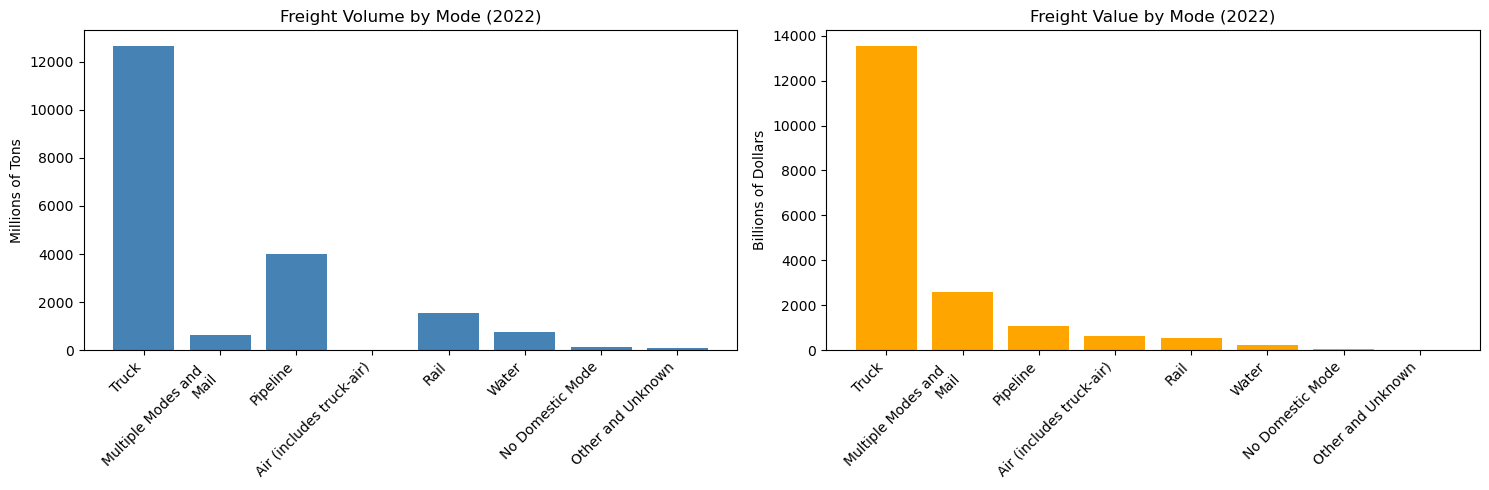

In [ ]:
# Analyze freight patterns by transportation mode
print("Freight Volume by Transportation Mode (2022):")
mode_analysis = domestic_flows.groupby('mode_name').agg({
    'tons_2022': 'sum',
    'value_2022': 'sum'
}).reset_index().sort_values('value_2022', ascending=False)

mode_analysis['tons_millions'] = (mode_analysis['tons_2022'] / 1000).round(1)
mode_analysis['value_billions'] = (mode_analysis['value_2022'] / 1000).round(1)

print(mode_analysis[['mode_name', 'tons_millions', 'value_billions']])

# Create visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(mode_analysis['mode_name'], mode_analysis['tons_millions'], color='steelblue')
plt.title('Freight Volume by Mode (2022)')
plt.ylabel('Millions of Tons')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2) 
plt.bar(mode_analysis['mode_name'], mode_analysis['value_billions'], color='orange')
plt.title('Freight Value by Mode (2022)')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Top Commodities by Value (2022):
                                       commodity_name  tons_millions  \
10  Electronic and Other Electrical Equipment and ...          107.1   
24      Motorized and Other Vehicles (includes parts)          219.8   
22                                      Mixed Freight          430.6   
32                            Pharmaceutical Products           33.8   
17                                          Machinery          140.4   
21                Miscellaneous Manufactured Products          105.1   
33                                Plastics and Rubber          278.1   
14  Gasoline, Aviation Turbine Fuel, and Ethanol (...         1417.9   
28  Other Coal and Petroleum Products, not elsewhe...         3165.1   
30           Other Prepared Foodstuffs, Fats and Oils          690.8   
37  Textiles, Leather, and Articles of Textiles or...           65.4   
34                Precision Instruments and Apparatus           15.2   
12  Fuel Oils (includes Diesel,

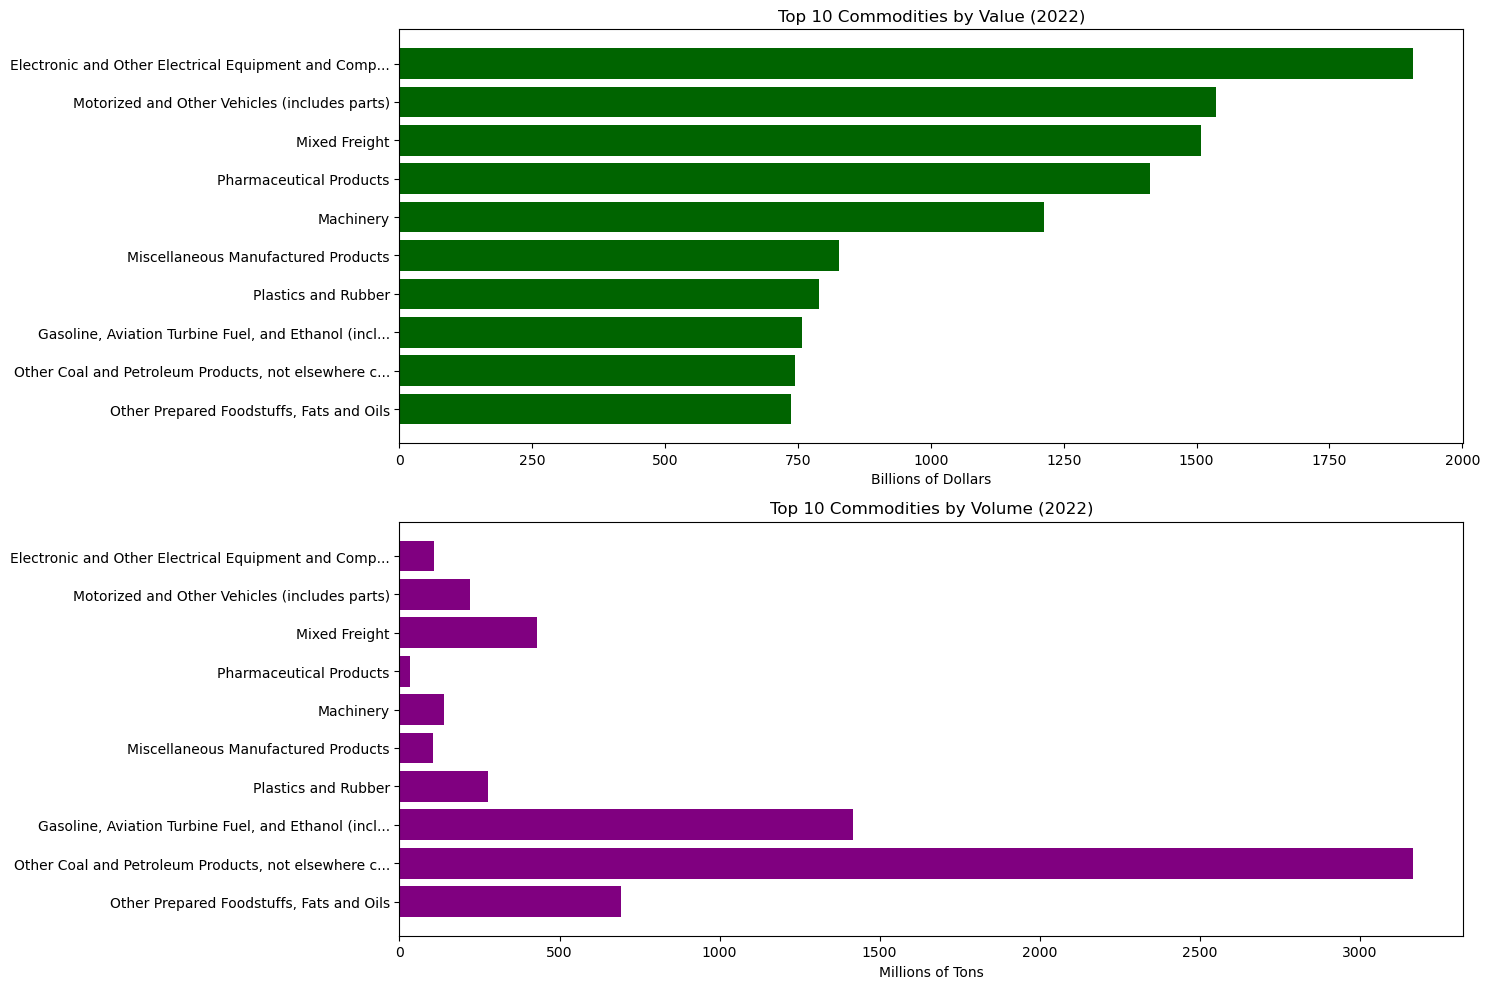

In [ ]:
# Analyze top commodities by value and volume
print("Top Commodities by Value (2022):")
commodity_analysis = domestic_flows.groupby('commodity_name').agg({
    'tons_2022': 'sum',
    'value_2022': 'sum'
}).reset_index().sort_values('value_2022', ascending=False)

commodity_analysis['tons_millions'] = (commodity_analysis['tons_2022'] / 1000).round(1)
commodity_analysis['value_billions'] = (commodity_analysis['value_2022'] / 1000).round(1)

print(commodity_analysis.head(15)[['commodity_name', 'tons_millions', 'value_billions']])

# Visualize top 10 commodities
top_commodities = commodity_analysis.head(10)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.barh(range(len(top_commodities)), top_commodities['value_billions'], color='darkgreen')
plt.yticks(range(len(top_commodities)), [name[:50] + '...' if len(name) > 50 else name for name in top_commodities['commodity_name']])
plt.xlabel('Billions of Dollars')
plt.title('Top 10 Commodities by Value (2022)')
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.barh(range(len(top_commodities)), top_commodities['tons_millions'], color='purple')
plt.yticks(range(len(top_commodities)), [name[:50] + '...' if len(name) > 50 else name for name in top_commodities['commodity_name']])
plt.xlabel('Millions of Tons')
plt.title('Top 10 Commodities by Volume (2022)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Top 10 Freight Producing States by Value (2022):
   origin_state  value_billions
43           TX          2412.7
4            CA          2257.9
14           IL          1074.0
34           NY           827.2
38           PA           736.2
22           MI           702.7
31           NJ           675.2
9            FL           671.0
35           OH           662.4
10           GA           651.9

Top 10 Freight Receiving States by Value (2022):
   dest_state  value_billions
43         TX          2378.8
4          CA          2034.8
14         IL           980.6
34         NY           930.6
9          FL           871.7
22         MI           741.8
35         OH           703.0
38         PA           669.1
10         GA           633.9
31         NJ           549.3


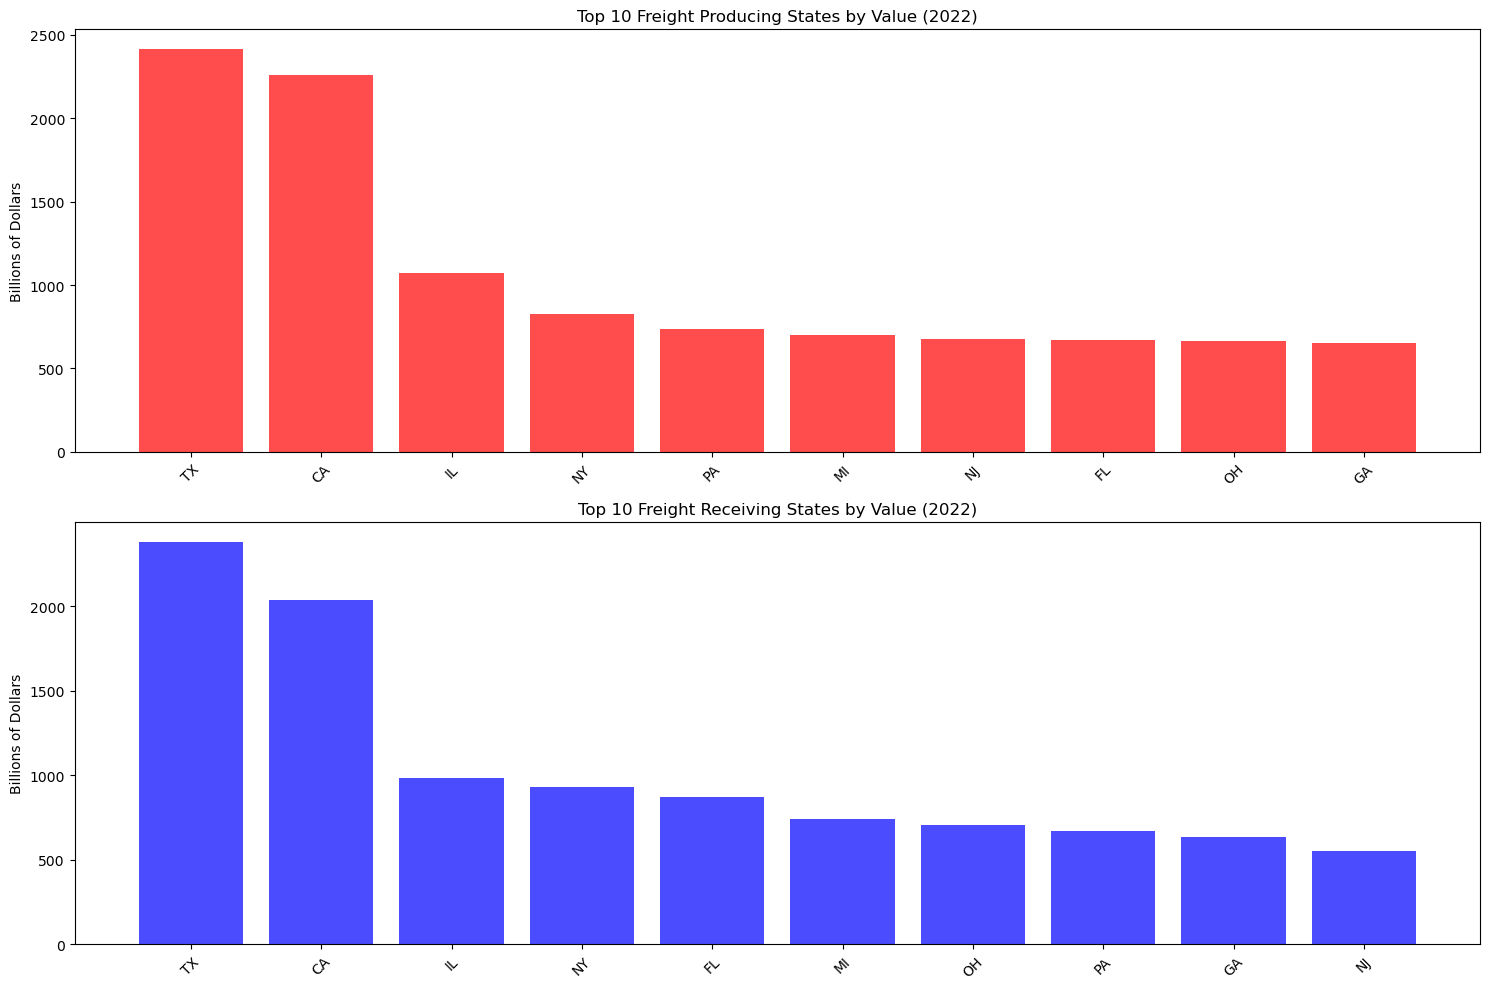

In [ ]:
# Analyze top freight-producing and freight-receiving states
print("Top 10 Freight Producing States by Value (2022):")
top_origin_states = freight_total_origin.nlargest(10, 'value_2022')
top_origin_states['value_billions'] = (top_origin_states['value_2022'] / 1000).round(1)
print(top_origin_states[['origin_state', 'value_billions']])

print("\nTop 10 Freight Receiving States by Value (2022):")
top_dest_states = freight_total_dest.nlargest(10, 'value_2022')
top_dest_states['value_billions'] = (top_dest_states['value_2022'] / 1000).round(1)
print(top_dest_states[['dest_state', 'value_billions']])

# Visualize top states
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.bar(top_origin_states['origin_state'], top_origin_states['value_billions'], color='red', alpha=0.7)
plt.title('Top 10 Freight Producing States by Value (2022)')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
plt.bar(top_dest_states['dest_state'], top_dest_states['value_billions'], color='blue', alpha=0.7)
plt.title('Top 10 Freight Receiving States by Value (2022)')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Integrate Freight Data with Economic Indicators

Now combine freight flows with BEA economic data to analyze relationships between freight activity and economic performance.


In [ ]:
gdp_real.head()

,GeoFIPS,GeoName,state_abbr,2017,2018,2019,2020,2021,2022,2023,2024
8,01000,Alabama,AL,216615.5,220808.8,225272.8,222288.8,233726.6,238556.5,245354.7,252664.5
16,02000,Alaska,AK,53550.9,52479.6,52377.5,50332.8,51454.1,50767.1,54059.7,54881.0
24,04000,Arizona,AZ,333099.0,346398.3,359576.7,365027.7,395035.9,410228.4,422399.6,433763.2
32,05000,Arkansas,AR,123882.6,126371.2,127220.0,128340.9,137463.6,139560.7,142860.6,148208.5
40,06000,California,CA,2740550.3,2850970.3,2969609.0,2933320.2,3154188.6,3184007.8,3248656.6,3365083.3


In [ ]:
# Prepare economic data for merging
# Create clean GDP dataset with numeric values
gdp_for_merge = gdp_real.copy()
years_to_analyze = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

for year in years_to_analyze:
    gdp_for_merge[f'gdp_{year}'] = pd.to_numeric(gdp_for_merge[year], errors='coerce')

gdp_for_merge = gdp_for_merge[['state_abbr'] + [f'gdp_{year}' for year in years_to_analyze]]

# Create personal income dataset
personal_income = key_indicators[key_indicators['LineCode'] == 5].copy()
for year in years_to_analyze:
    personal_income[f'income_{year}'] = pd.to_numeric(personal_income[year], errors='coerce')

personal_income = personal_income[['state_abbr'] + [f'income_{year}' for year in years_to_analyze]]

print("GDP Data:")
print(gdp_for_merge.head())
print(f"\nPersonal Income Data:")
print(personal_income.head())


GDP Data:
   state_abbr   gdp_2017   gdp_2018   gdp_2019   gdp_2020   gdp_2021  \
8          AL   216615.5   220808.8   225272.8   222288.8   233726.6   
16         AK    53550.9    52479.6    52377.5    50332.8    51454.1   
24         AZ   333099.0   346398.3   359576.7   365027.7   395035.9   
32         AR   123882.6   126371.2   127220.0   128340.9   137463.6   
40         CA  2740550.3  2850970.3  2969609.0  2933320.2  3154188.6   

     gdp_2022   gdp_2023  
8    238556.5   245354.7  
16    50767.1    54059.7  
24   410228.4   422399.6  
32   139560.7   142860.6  
40  3184007.8  3248656.6  

Personal Income Data:
   state_abbr  income_2017  income_2018  income_2019  income_2020  \
19         AL     197963.8     205674.2     215151.8     230732.2   
34         AK      41919.4      43522.7      44459.7      45339.6   
49         AZ     297261.5     315459.0     337257.2     374007.2   
64         AR     123825.4     128970.8     131394.8     141985.7   
79         CA    2295048.7 

In [ ]:
# Create combined dataset linking freight flows with economic indicators
# Start with freight origin data (production)
freight_econ_origin = freight_total_origin.merge(
    gdp_for_merge, 
    left_on='origin_state', 
    right_on='state_abbr', 
    how='inner'
)

freight_econ_origin = freight_econ_origin.merge(
    personal_income,
    on='state_abbr',
    how='inner'
)

# Create billions/millions columns for easier interpretation
for year in years_to_analyze:
    freight_econ_origin[f'freight_value_billions_{year}'] = freight_econ_origin[f'value_{year}'] / 1000
    freight_econ_origin[f'freight_tons_millions_{year}'] = freight_econ_origin[f'tons_{year}'] / 1000
    freight_econ_origin[f'gdp_billions_{year}'] = freight_econ_origin[f'gdp_{year}'] / 1000
    freight_econ_origin[f'income_billions_{year}'] = freight_econ_origin[f'income_{year}'] / 1000

print("Combined Freight and Economic Data (Origin States):")
print(f"Shape: {freight_econ_origin.shape}")
print(freight_econ_origin[['origin_state', 'freight_value_billions_2022', 'gdp_billions_2022', 'income_billions_2022']].head())


Combined Freight and Economic Data (Origin States):
Shape: (51, 58)
  origin_state  freight_value_billions_2022  gdp_billions_2022  \
0           AK                    47.458136            50.7671   
1           AL                   282.127473           238.5565   
2           AR                   140.645694           139.5607   
3           AZ                   226.406831           410.2284   
4           CA                  2257.910844          3184.0078   

   income_billions_2022  
0               50.6068  
1              262.2356  
2              168.5348  
3              434.3389  
4             3003.8261  


In [ ]:
# Create similar dataset for destination states (consumption)
freight_econ_dest = freight_total_dest.merge(
    gdp_for_merge, 
    left_on='dest_state', 
    right_on='state_abbr', 
    how='inner'
)

freight_econ_dest = freight_econ_dest.merge(
    personal_income,
    on='state_abbr',
    how='inner'
)

# Create billions/millions columns for easier interpretation
for year in years_to_analyze:
    freight_econ_dest[f'freight_value_billions_{year}'] = freight_econ_dest[f'value_{year}'] / 1000
    freight_econ_dest[f'freight_tons_millions_{year}'] = freight_econ_dest[f'tons_{year}'] / 1000
    freight_econ_dest[f'gdp_billions_{year}'] = freight_econ_dest[f'gdp_{year}'] / 1000
    freight_econ_dest[f'income_billions_{year}'] = freight_econ_dest[f'income_{year}'] / 1000

print("Combined Freight and Economic Data (Destination States):")
print(f"Shape: {freight_econ_dest.shape}")
print(freight_econ_dest[['dest_state', 'freight_value_billions_2022', 'gdp_billions_2022', 'income_billions_2022']].head())


Combined Freight and Economic Data (Destination States):
Shape: (51, 58)
  dest_state  freight_value_billions_2022  gdp_billions_2022  \
0         AK                    50.301292            50.7671   
1         AL                   287.514773           238.5565   
2         AR                   147.023962           139.5607   
3         AZ                   251.016452           410.2284   
4         CA                  2034.769483          3184.0078   

   income_billions_2022  
0               50.6068  
1              262.2356  
2              168.5348  
3              434.3389  
4             3003.8261  


## Step 5: Correlation Analysis - Freight Activity vs Economic Performance

Now let's analyze the relationships between freight activity and economic indicators to answer your key research questions.


CORRELATION ANALYSIS FOR FREIGHT PRODUCTION (ORIGIN STATES)
Correlation between Freight Value (Origin) and GDP: 0.916
Correlation between Freight Value (Origin) and Personal Income: 0.919


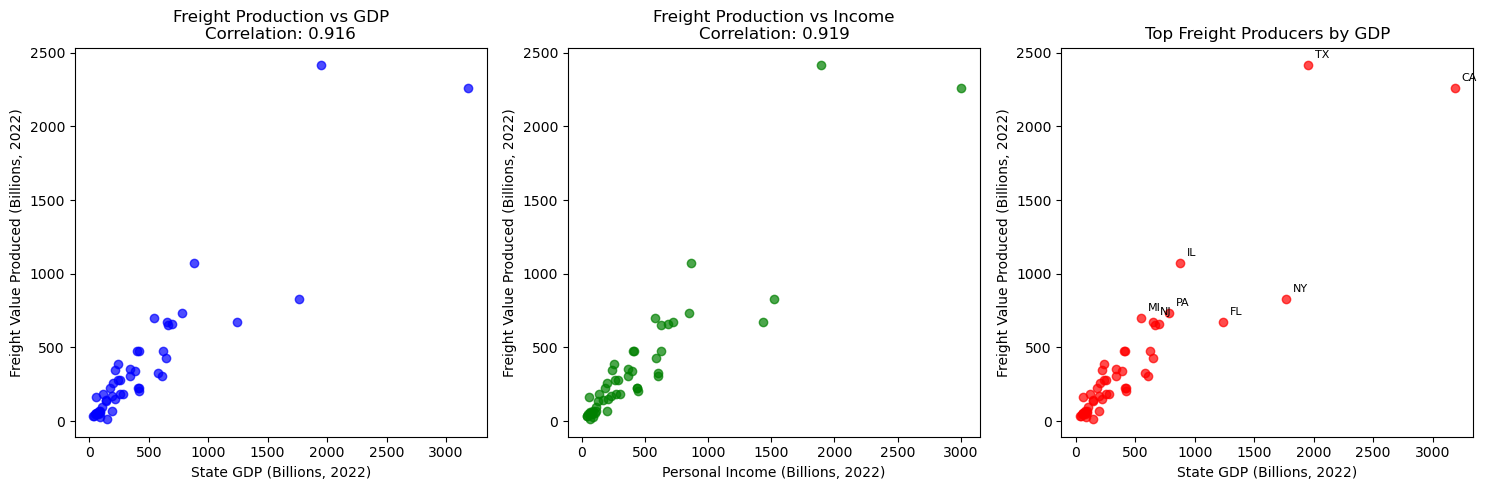

In [ ]:
# Analyze correlations between freight activity and GDP (2022)
correlation_year = '2022'

print("CORRELATION ANALYSIS FOR FREIGHT PRODUCTION (ORIGIN STATES)")
print("="*60)

# Calculate correlations
freight_gdp_corr = freight_econ_origin[f'freight_value_billions_{correlation_year}'].corr(
    freight_econ_origin[f'gdp_billions_{correlation_year}']
)
freight_income_corr = freight_econ_origin[f'freight_value_billions_{correlation_year}'].corr(
    freight_econ_origin[f'income_billions_{correlation_year}']
)

print(f"Correlation between Freight Value (Origin) and GDP: {freight_gdp_corr:.3f}")
print(f"Correlation between Freight Value (Origin) and Personal Income: {freight_income_corr:.3f}")

# Create scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(freight_econ_origin[f'gdp_billions_{correlation_year}'], 
           freight_econ_origin[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='blue')
plt.xlabel(f'State GDP (Billions, {correlation_year})')
plt.ylabel(f'Freight Value Produced (Billions, {correlation_year})')
plt.title(f'Freight Production vs GDP\nCorrelation: {freight_gdp_corr:.3f}')

plt.subplot(1, 3, 2)
plt.scatter(freight_econ_origin[f'income_billions_{correlation_year}'], 
           freight_econ_origin[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='green')
plt.xlabel(f'Personal Income (Billions, {correlation_year})')
plt.ylabel(f'Freight Value Produced (Billions, {correlation_year})')
plt.title(f'Freight Production vs Income\nCorrelation: {freight_income_corr:.3f}')

# Add state labels for outliers/interesting cases
plt.subplot(1, 3, 3)
plt.scatter(freight_econ_origin[f'gdp_billions_{correlation_year}'], 
           freight_econ_origin[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='red')

# Label top freight producing states
top_freight_states = freight_econ_origin.nlargest(8, f'freight_value_billions_{correlation_year}')
for _, row in top_freight_states.iterrows():
    plt.annotate(row['origin_state'], 
                (row[f'gdp_billions_{correlation_year}'], row[f'freight_value_billions_{correlation_year}']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel(f'State GDP (Billions, {correlation_year})')
plt.ylabel(f'Freight Value Produced (Billions, {correlation_year})')
plt.title('Top Freight Producers by GDP')

plt.tight_layout()
plt.show()



CORRELATION ANALYSIS FOR FREIGHT CONSUMPTION (DESTINATION STATES)
Correlation between Freight Value (Destination) and GDP: 0.919
Correlation between Freight Value (Destination) and Personal Income: 0.925


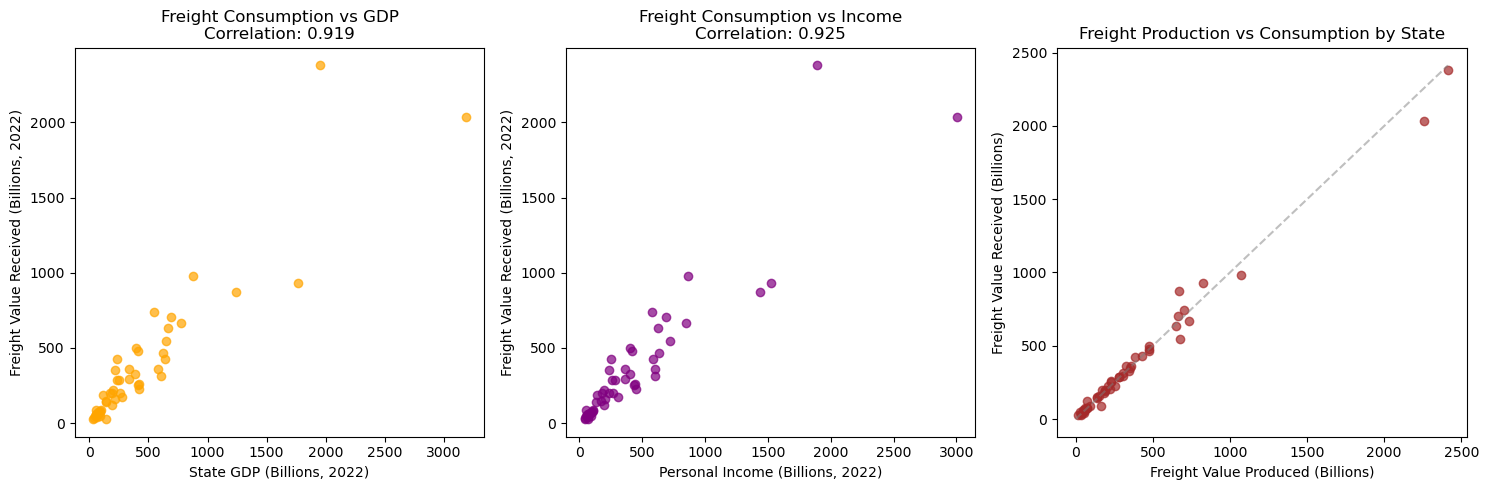

In [ ]:
# Analyze freight consumption patterns (destination states)
print("\nCORRELATION ANALYSIS FOR FREIGHT CONSUMPTION (DESTINATION STATES)")
print("="*65)

# Calculate correlations for destination states
dest_freight_gdp_corr = freight_econ_dest[f'freight_value_billions_{correlation_year}'].corr(
    freight_econ_dest[f'gdp_billions_{correlation_year}']
)
dest_freight_income_corr = freight_econ_dest[f'freight_value_billions_{correlation_year}'].corr(
    freight_econ_dest[f'income_billions_{correlation_year}']
)

print(f"Correlation between Freight Value (Destination) and GDP: {dest_freight_gdp_corr:.3f}")
print(f"Correlation between Freight Value (Destination) and Personal Income: {dest_freight_income_corr:.3f}")

# Create scatter plots for destination analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(freight_econ_dest[f'gdp_billions_{correlation_year}'], 
           freight_econ_dest[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='orange')
plt.xlabel(f'State GDP (Billions, {correlation_year})')
plt.ylabel(f'Freight Value Received (Billions, {correlation_year})')
plt.title(f'Freight Consumption vs GDP\nCorrelation: {dest_freight_gdp_corr:.3f}')

plt.subplot(1, 3, 2)
plt.scatter(freight_econ_dest[f'income_billions_{correlation_year}'], 
           freight_econ_dest[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='purple')
plt.xlabel(f'Personal Income (Billions, {correlation_year})')
plt.ylabel(f'Freight Value Received (Billions, {correlation_year})')
plt.title(f'Freight Consumption vs Income\nCorrelation: {dest_freight_income_corr:.3f}')

# Compare production vs consumption
plt.subplot(1, 3, 3)
plt.scatter(freight_econ_origin[f'freight_value_billions_{correlation_year}'], 
           freight_econ_dest[f'freight_value_billions_{correlation_year}'], 
           alpha=0.7, color='brown')
plt.xlabel(f'Freight Value Produced (Billions)')
plt.ylabel(f'Freight Value Received (Billions)')
plt.title('Freight Production vs Consumption by State')

# Add diagonal line for reference
max_val = max(freight_econ_origin[f'freight_value_billions_{correlation_year}'].max(),
              freight_econ_dest[f'freight_value_billions_{correlation_year}'].max())
plt.plot([0, max_val], [0, max_val], '--', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Dark theme
plt.style.use("dark_background")

print("CORRELATION ANALYSIS BY TRANSPORTATION MODE")
print("="*45)

# Calculate correlations (your same logic)
mode_correlations = []
for mode in freight_by_mode_econ['mode_name'].unique():
    mode_data = freight_by_mode_econ[freight_by_mode_econ['mode_name'] == mode]
    
    if len(mode_data) > 5:  # Only analyze modes with sufficient data
        freight_value_col = f'value_{correlation_year}'
        gdp_col = f'gdp_{correlation_year}'
        
        if mode_data[freight_value_col].sum() > 0:  # Only if mode has actual freight value
            corr = mode_data[freight_value_col].corr(mode_data[gdp_col])
            mode_correlations.append({
                'mode': mode,
                'correlation': corr,
                'freight_value_billions': mode_data[freight_value_col].sum() / 1000,
                'num_states': len(mode_data)
            })

mode_corr_df = pd.DataFrame(mode_correlations).sort_values('correlation', ascending=False)
print(mode_corr_df)

# --- Visualization ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 1. Correlation by mode
colors_corr = [
    '#32FF6A' if x > 0.5 else '#FFB347' if x > 0.3 else '#FF7043'
    for x in mode_corr_df['correlation']
]

axes[0].bar(range(len(mode_corr_df)), mode_corr_df['correlation'], color=colors_corr)
axes[0].set_xticks(range(len(mode_corr_df)))
axes[0].set_xticklabels(mode_corr_df['mode'], rotation=45, ha='right', color='white')
axes[0].set_ylabel('Correlation with GDP', color='white')
axes[0].set_title('Freight-GDP Correlation by Transportation Mode (2022)', color='white')
axes[0].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
axes[0].axhline(y=0.5, color='#32FF6A', linestyle='--', alpha=0.6, label='Strong (>0.5)')
axes[0].axhline(y=0.3, color='#FFB347', linestyle='--', alpha=0.6, label='Moderate (>0.3)')
axes[0].legend()

# 2. Total freight value by mode
axes[1].bar(range(len(mode_corr_df)), mode_corr_df['freight_value_billions'], color='#00CFFF')
axes[1].set_xticks(range(len(mode_corr_df)))
axes[1].set_xticklabels(mode_corr_df['mode'], rotation=45, ha='right', color='white')
axes[1].set_ylabel('Total Freight Value (Billions $)', color='white')
axes[1].set_title('Total Freight Value by Transportation Mode (2022)', color='white')

# Format axes
for ax in axes:
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')

plt.tight_layout()
plt.savefig("mode_correlation_dark.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()


NameError: name 'plt' is not defined

CORRELATION ANALYSIS BY TRANSPORTATION MODE
                        mode  correlation  freight_value_billions  num_states
1  Multiple Modes and \nMail     0.952233             2582.613791          51
6                      Truck     0.925999            13558.542315          51
2           No Domestic Mode     0.894262               38.038735          17
0   Air (includes truck-air)     0.831758              649.364456          51
3          Other and Unknown     0.628529               25.852754          51
5                       Rail     0.510441              562.632943          50
4                   Pipeline     0.444551             1069.185703          50
7                      Water     0.321620              251.335526          41


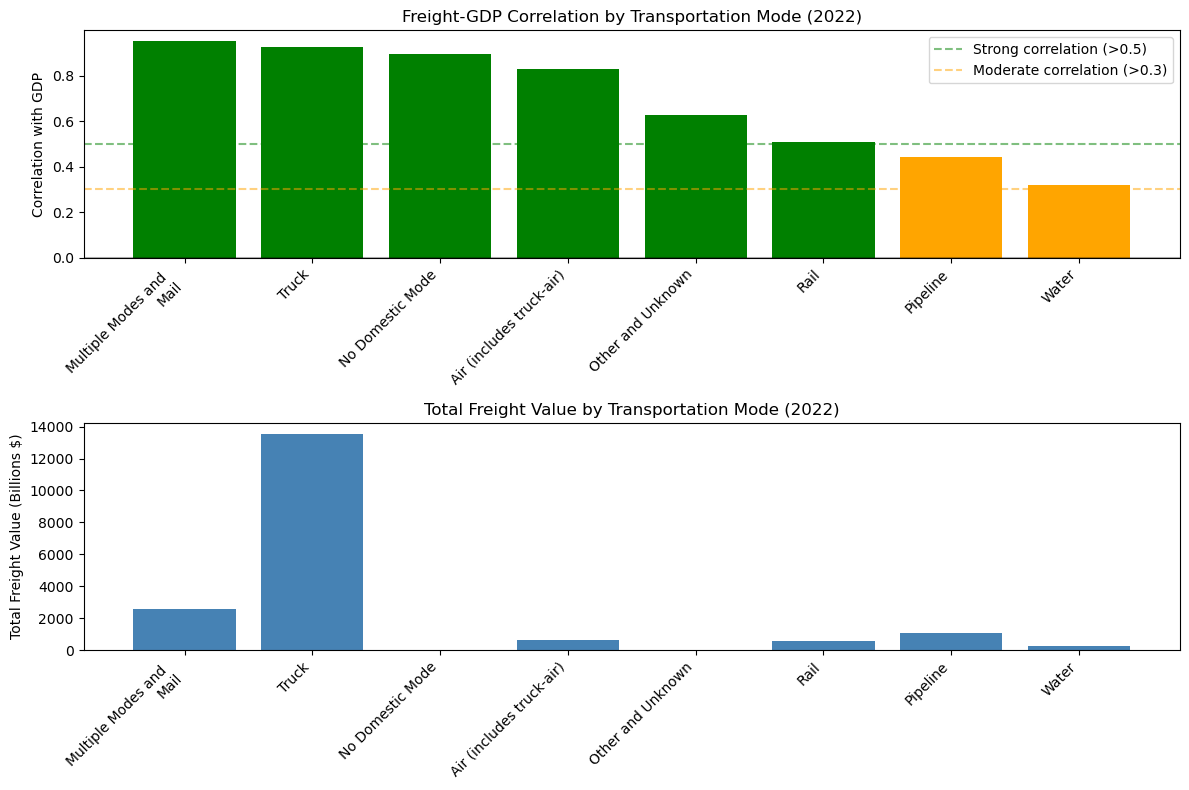

In [ ]:
# Analyze correlations by transportation mode
print("CORRELATION ANALYSIS BY TRANSPORTATION MODE")
print("="*45)

# Prepare freight data by mode for analysis
freight_by_mode_econ = freight_by_origin.merge(
    gdp_for_merge, 
    left_on='origin_state', 
    right_on='state_abbr', 
    how='inner'
)


# Calculate correlations for each transportation mode
mode_correlations = []
for mode in freight_by_mode_econ['mode_name'].unique():
    mode_data = freight_by_mode_econ[freight_by_mode_econ['mode_name'] == mode]
    
    if len(mode_data) > 5:  # Only analyze modes with sufficient data
        freight_value_col = f'value_{correlation_year}'
        gdp_col = f'gdp_{correlation_year}'
        
        if mode_data[freight_value_col].sum() > 0:  # Only if mode has actual freight value
            corr = mode_data[freight_value_col].corr(mode_data[gdp_col])
            mode_correlations.append({
                'mode': mode,
                'correlation': corr,
                'freight_value_billions': mode_data[freight_value_col].sum() / 1000,
                'num_states': len(mode_data)
            })

mode_corr_df = pd.DataFrame(mode_correlations).sort_values('correlation', ascending=False)
print(mode_corr_df)

# Visualize mode correlations
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
bars = plt.bar(range(len(mode_corr_df)), mode_corr_df['correlation'], 
               color=['green' if x > 0.5 else 'orange' if x > 0.3 else 'red' for x in mode_corr_df['correlation']])

plt.xticks(range(len(mode_corr_df)), mode_corr_df['mode'], rotation=45, ha='right')
plt.ylabel('Correlation with GDP')
plt.title('Freight-GDP Correlation by Transportation Mode (2022)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Strong correlation (>0.5)')
plt.axhline(y=0.3, color='orange', linestyle='--', alpha=0.5, label='Moderate correlation (>0.3)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(range(len(mode_corr_df)), mode_corr_df['freight_value_billions'], color='steelblue')
plt.xticks(range(len(mode_corr_df)), mode_corr_df['mode'], rotation=45, ha='right')
plt.ylabel('Total Freight Value (Billions $)')
plt.title('Total Freight Value by Transportation Mode (2022)')

plt.tight_layout()
plt.show()


In [ ]:
# Prepare freight data by commodity for analysis
freight_by_commodity = domestic_flows.groupby(['origin_state', 'commodity_name']).agg({
    f'tons_{correlation_year}': 'sum',
    f'value_{correlation_year}': 'sum'
}).reset_index()

freight_by_commodity_econ = freight_by_commodity.merge(
    gdp_for_merge, 
    left_on='origin_state', 
    right_on='state_abbr', 
    how='inner'
)

In [ ]:
# Prepare freight data by commodity for analysis for all years
freight_by_commodity_all = domestic_flows.groupby(['origin_state', 'commodity_name']).agg({
    'tons_2017': 'sum',
    'tons_2018': 'sum', 
    'tons_2019': 'sum',
    'tons_2020': 'sum',
    'tons_2021': 'sum',
    'tons_2022': 'sum',
    'tons_2023': 'sum',
    'value_2017': 'sum',
    'value_2018': 'sum',
    'value_2019': 'sum', 
    'value_2020': 'sum',
    'value_2021': 'sum',
    'value_2022': 'sum',
    'value_2023': 'sum'
}).reset_index()

freight_by_commodity_econ_all = freight_by_commodity_all.merge(
    gdp_for_merge, 
    left_on='origin_state', 
    right_on='state_abbr', 
    how='inner'
)

In [ ]:
# Analyze correlations by commodity type
print("CORRELATION ANALYSIS BY COMMODITY TYPE")
print("="*40)

# Calculate correlations for top commodities by value
top_commodities_list = commodity_analysis.head(10)['commodity_name'].tolist()

commodity_correlations = []
for commodity in top_commodities_list:
    commodity_data = freight_by_commodity_econ[freight_by_commodity_econ['commodity_name'] == commodity]
    
    if len(commodity_data) > 5:  # Only analyze commodities with sufficient data
        freight_value_col = f'value_{correlation_year}'
        gdp_col = f'gdp_{correlation_year}'
        
        if commodity_data[freight_value_col].sum() > 0:
            corr = commodity_data[freight_value_col].corr(commodity_data[gdp_col])
            commodity_correlations.append({
                'commodity': commodity,
                'correlation': corr,
                'freight_value_billions': commodity_data[freight_value_col].sum() / 1000,
                'num_states': len(commodity_data)
            })

commodity_corr_df = pd.DataFrame(commodity_correlations).sort_values('correlation', ascending=False)
print(commodity_corr_df)

CORRELATION ANALYSIS BY COMMODITY TYPE
                                           commodity  correlation  \
2                                      Mixed Freight     0.933925   
0  Electronic and Other Electrical Equipment and ...     0.915217   
9           Other Prepared Foodstuffs, Fats and Oils     0.895256   
5                Miscellaneous Manufactured Products     0.869548   
4                                          Machinery     0.845515   
3                            Pharmaceutical Products     0.843993   
6                                Plastics and Rubber     0.822659   
1      Motorized and Other Vehicles (includes parts)     0.602331   
7  Gasoline, Aviation Turbine Fuel, and Ethanol (...     0.591962   
8  Other Coal and Petroleum Products, not elsewhe...     0.478723   

   freight_value_billions  num_states  
2             1507.308890          51  
0             1906.482214          51  
9              737.380487          51  
5              826.460088          51  
4

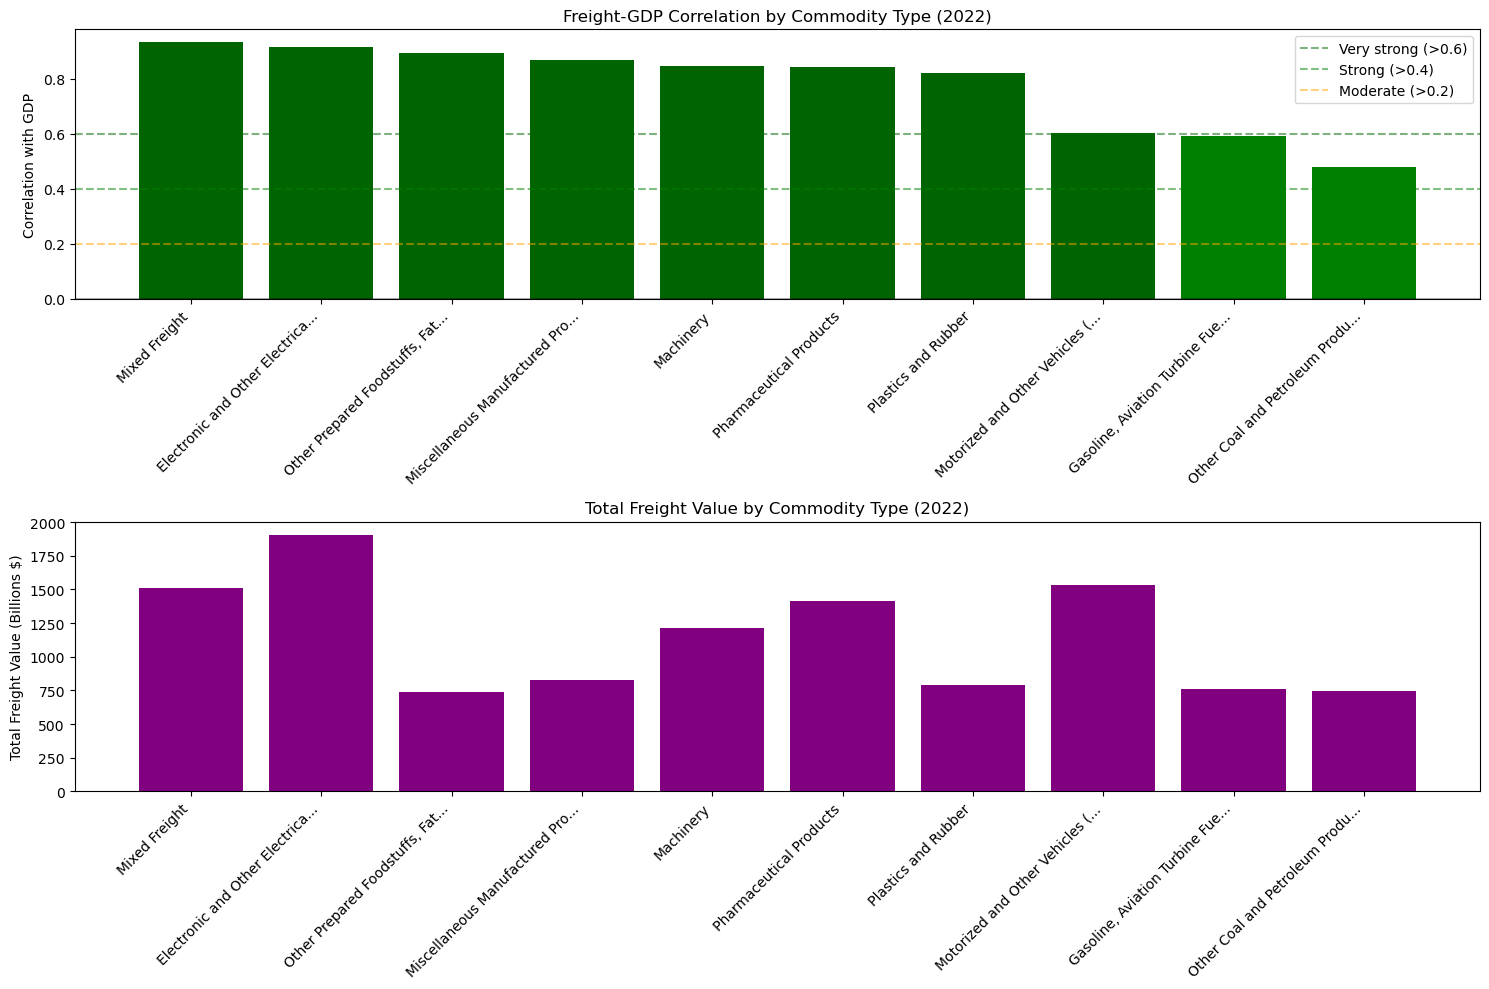

In [ ]:
# Visualize commodity correlations
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
commodity_names_short = [name[:30] + '...' if len(name) > 30 else name for name in commodity_corr_df['commodity']]
bars = plt.bar(range(len(commodity_corr_df)), commodity_corr_df['correlation'], 
               color=['darkgreen' if x > 0.6 else 'green' if x > 0.4 else 'orange' if x > 0.2 else 'red' for x in commodity_corr_df['correlation']])
plt.xticks(range(len(commodity_corr_df)), commodity_names_short, rotation=45, ha='right')
plt.ylabel('Correlation with GDP')
plt.title('Freight-GDP Correlation by Commodity Type (2022)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.6, color='darkgreen', linestyle='--', alpha=0.5, label='Very strong (>0.6)')
plt.axhline(y=0.4, color='green', linestyle='--', alpha=0.5, label='Strong (>0.4)')
plt.axhline(y=0.2, color='orange', linestyle='--', alpha=0.5, label='Moderate (>0.2)')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(range(len(commodity_corr_df)), commodity_corr_df['freight_value_billions'], color='purple')
plt.xticks(range(len(commodity_corr_df)), commodity_names_short, rotation=45, ha='right')
plt.ylabel('Total Freight Value (Billions $)')
plt.title('Total Freight Value by Commodity Type (2022)')

plt.tight_layout()
plt.show()


## Step 6: Time Trend Analysis - Growth Patterns

Let's examine how freight growth relates to economic growth over time to identify trends.


In [ ]:
# Calculate growth rates for freight and GDP
print("GROWTH RATE ANALYSIS (2017-2023)")
print("="*35)

# Calculate freight growth rates (using 2017 as base year)
freight_econ_origin['freight_growth_2017_2022'] = (
    (freight_econ_origin['freight_value_billions_2022'] - freight_econ_origin['freight_value_billions_2017']) / 
    freight_econ_origin['freight_value_billions_2017'] * 100
)

# Calculate GDP growth rates (using 2017 as base year)
freight_econ_origin['gdp_growth_2017_2022'] = (
    (freight_econ_origin['gdp_billions_2022'] - freight_econ_origin['gdp_billions_2017']) / 
    freight_econ_origin['gdp_billions_2017'] * 100
)

# Remove infinite values and outliers
growth_analysis = freight_econ_origin[
    (freight_econ_origin['freight_growth_2017_2022'].notna()) & 
    (freight_econ_origin['gdp_growth_2017_2022'].notna()) &
    (freight_econ_origin['freight_growth_2017_2022'] != float('inf')) &
    (freight_econ_origin['gdp_growth_2017_2022'] != float('inf')) &
    (freight_econ_origin['freight_value_billions_2017'] > 0.1)  # Filter very small values
].copy()

# Calculate correlation between growth rates
growth_correlation = growth_analysis['freight_growth_2017_2022'].corr(growth_analysis['gdp_growth_2017_2022'])

print(f"Correlation between Freight Growth and GDP Growth (2017-2022): {growth_correlation:.3f}")
print(f"Number of states in growth analysis: {len(growth_analysis)}")

# Show top and bottom performers
print("\nTop 5 States by Freight Growth (2017-2022):")
top_freight_growth = growth_analysis.nlargest(5, 'freight_growth_2017_2022')[
    ['origin_state', 'freight_growth_2017_2022', 'gdp_growth_2017_2022']
]
print(top_freight_growth)

print("\nTop 5 States by GDP Growth (2017-2022):")
top_gdp_growth = growth_analysis.nlargest(5, 'gdp_growth_2017_2022')[
    ['origin_state', 'freight_growth_2017_2022', 'gdp_growth_2017_2022']
]
print(top_gdp_growth)


GROWTH RATE ANALYSIS (2017-2023)
Correlation between Freight Growth and GDP Growth (2017-2022): -0.006
Number of states in growth analysis: 51

Top 5 States by Freight Growth (2017-2022):
   origin_state  freight_growth_2017_2022  gdp_growth_2017_2022
32           NM                 39.310759             10.826616
7            DC                 21.766513              7.636554
26           MT                  7.601062             13.871117
28           ND                  5.495232             -0.959133
20           MD                  4.393533              4.175906

Top 5 States by GDP Growth (2017-2022):
   origin_state  freight_growth_2017_2022  gdp_growth_2017_2022
13           ID                 -0.556479             27.378587
44           UT                 -1.472743             26.364957
3            AZ                 -0.575756             23.155098
47           WA                -11.506104             22.176116
9            FL                 -0.538686             22.172040


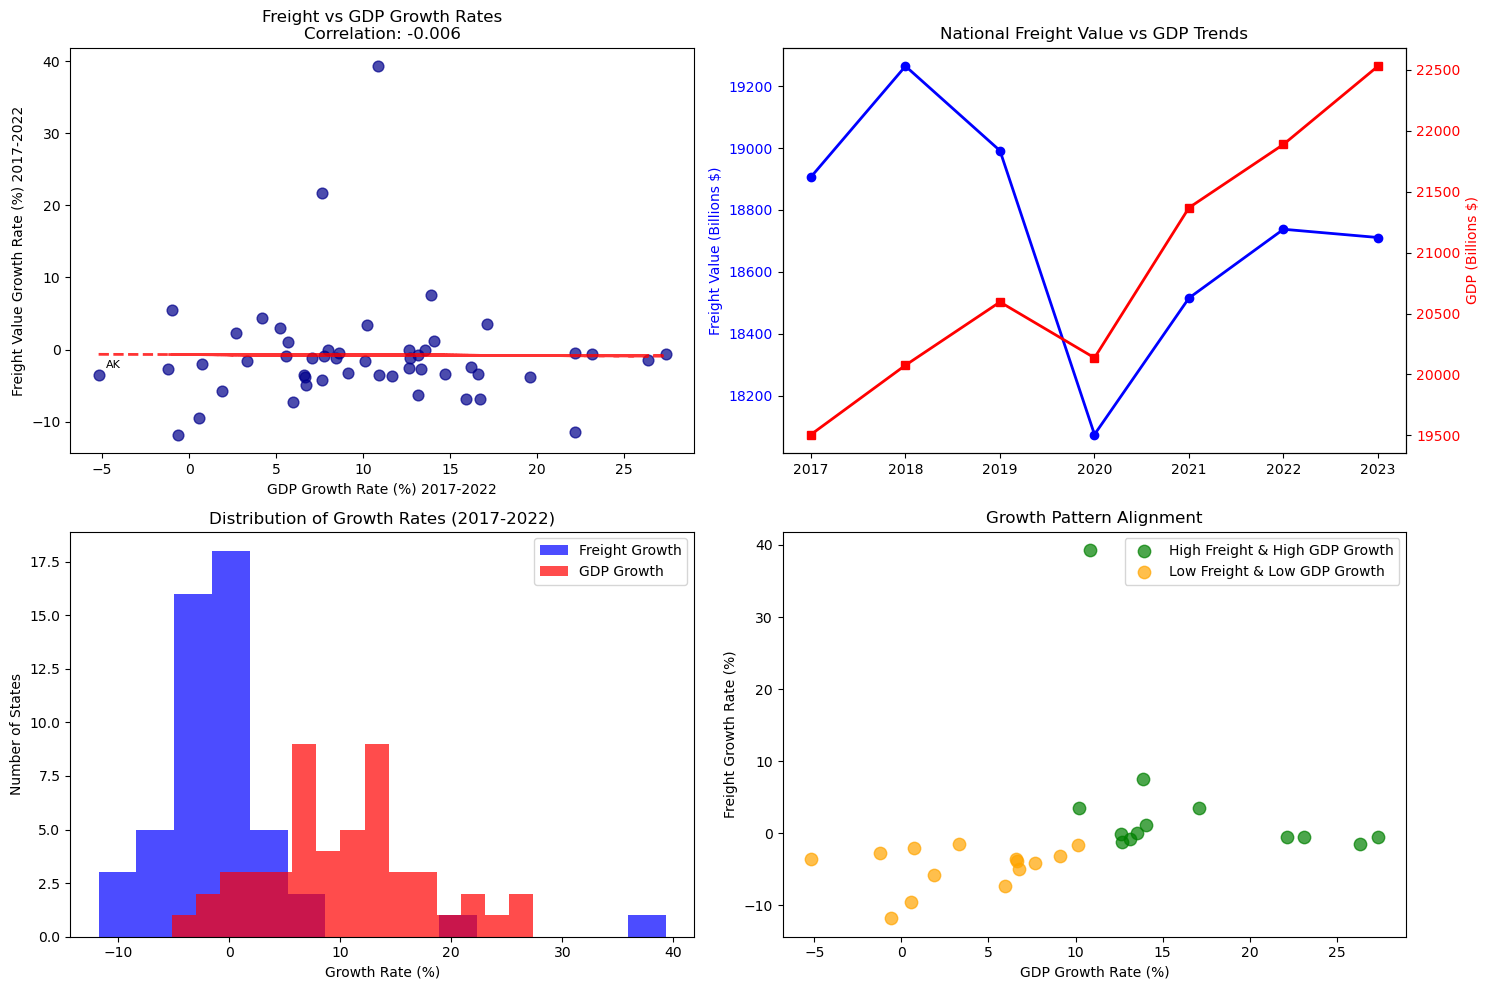

In [ ]:
# Visualize growth rate relationships
plt.figure(figsize=(15, 10))

# Scatter plot of growth rates
plt.subplot(2, 2, 1)
plt.scatter(growth_analysis['gdp_growth_2017_2022'], 
           growth_analysis['freight_growth_2017_2022'], 
           alpha=0.7, color='darkblue', s=60)
plt.xlabel('GDP Growth Rate (%) 2017-2022')
plt.ylabel('Freight Value Growth Rate (%) 2017-2022')
plt.title(f'Freight vs GDP Growth Rates\nCorrelation: {growth_correlation:.3f}')

# Add trend line
z = np.polyfit(growth_analysis['gdp_growth_2017_2022'], growth_analysis['freight_growth_2017_2022'], 1)
p = np.poly1d(z)
plt.plot(growth_analysis['gdp_growth_2017_2022'], p(growth_analysis['gdp_growth_2017_2022']), 
         "r--", alpha=0.8, linewidth=2)

# Label outliers
for _, row in growth_analysis.iterrows():
    if (row['freight_growth_2017_2022'] > 50 or row['freight_growth_2017_2022'] < -30 or 
        row['gdp_growth_2017_2022'] > 30 or row['gdp_growth_2017_2022'] < -5):
        plt.annotate(row['origin_state'], 
                    (row['gdp_growth_2017_2022'], row['freight_growth_2017_2022']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

# Time series of national totals
plt.subplot(2, 2, 2)
national_totals = []
for year in ['2017', '2018', '2019', '2020', '2021', '2022', '2023']:
    freight_total = freight_econ_origin[f'freight_value_billions_{year}'].sum()
    gdp_total = freight_econ_origin[f'gdp_billions_{year}'].sum()
    national_totals.append({'year': year, 'freight': freight_total, 'gdp': gdp_total})

national_df = pd.DataFrame(national_totals)
plt.plot(national_df['year'], national_df['freight'], 'b-o', label='Total Freight Value', linewidth=2)
plt.ylabel('Freight Value (Billions $)', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

ax2 = plt.gca().twinx()
ax2.plot(national_df['year'], national_df['gdp'], 'r-s', label='Total GDP', linewidth=2)
ax2.set_ylabel('GDP (Billions $)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('National Freight Value vs GDP Trends')
plt.xticks(rotation=45)

# Distribution of growth rates
plt.subplot(2, 2, 3)
plt.hist(growth_analysis['freight_growth_2017_2022'], bins=15, alpha=0.7, color='blue', label='Freight Growth')
plt.hist(growth_analysis['gdp_growth_2017_2022'], bins=15, alpha=0.7, color='red', label='GDP Growth')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Number of States')
plt.title('Distribution of Growth Rates (2017-2022)')
plt.legend()

# States with aligned growth (both high or both low)
plt.subplot(2, 2, 4)
# Create quadrants
high_freight_high_gdp = growth_analysis[
    (growth_analysis['freight_growth_2017_2022'] > growth_analysis['freight_growth_2017_2022'].median()) &
    (growth_analysis['gdp_growth_2017_2022'] > growth_analysis['gdp_growth_2017_2022'].median())
]

plt.scatter(high_freight_high_gdp['gdp_growth_2017_2022'], 
           high_freight_high_gdp['freight_growth_2017_2022'], 
           color='green', s=80, alpha=0.7, label='High Freight & High GDP Growth')

# Add other quadrants with different colors
low_low = growth_analysis[
    (growth_analysis['freight_growth_2017_2022'] <= growth_analysis['freight_growth_2017_2022'].median()) &
    (growth_analysis['gdp_growth_2017_2022'] <= growth_analysis['gdp_growth_2017_2022'].median())
]
plt.scatter(low_low['gdp_growth_2017_2022'], low_low['freight_growth_2017_2022'], 
           color='orange', s=80, alpha=0.7, label='Low Freight & Low GDP Growth')

plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Freight Growth Rate (%)')
plt.title('Growth Pattern Alignment')
plt.legend()

plt.tight_layout()
plt.show()


## Step 7: Key Insights and Findings

Let's summarize the key findings to answer your capstone research questions.


In [ ]:
# Create a comprehensive summary analysis
print("="*80)
print("CAPSTONE FINDINGS: FREIGHT FLOWS AND REGIONAL ECONOMIC GROWTH")
print("="*80)

print("\n1. OVERALL FREIGHT-ECONOMY CORRELATIONS:")
print("-" * 50)
print(f"• Freight Production vs GDP:        {freight_gdp_corr:.3f}")
print(f"• Freight Production vs Income:     {freight_income_corr:.3f}")
print(f"• Freight Consumption vs GDP:       {dest_freight_gdp_corr:.3f}")
print(f"• Freight Consumption vs Income:    {dest_freight_income_corr:.3f}")
print(f"• Freight Growth vs GDP Growth:     {growth_correlation:.3f}")

print("\n2. TOP PERFORMING TRANSPORTATION MODES (by GDP correlation):")
print("-" * 65)
for i, row in mode_corr_df.head(3).iterrows():
    print(f"• {row['mode']:<25} Correlation: {row['correlation']:.3f}, Value: ${row['freight_value_billions']:.1f}B")

print("\n3. TOP PERFORMING COMMODITY TYPES (by GDP correlation):")
print("-" * 60)
for i, row in commodity_corr_df.head(3).iterrows():
    commodity_short = row['commodity'][:35] + '...' if len(row['commodity']) > 35 else row['commodity']
    print(f"• {commodity_short:<38} Correlation: {row['correlation']:.3f}")

print("\n4. STATES WITH ALIGNED HIGH GROWTH (Freight + GDP):")
print("-" * 55)
aligned_high_growth = growth_analysis[
    (growth_analysis['freight_growth_2017_2022'] > growth_analysis['freight_growth_2017_2022'].quantile(0.75)) &
    (growth_analysis['gdp_growth_2017_2022'] > growth_analysis['gdp_growth_2017_2022'].quantile(0.75))
]
for _, row in aligned_high_growth.head(5).iterrows():
    print(f"• {row['origin_state']}: Freight Growth {row['freight_growth_2017_2022']:.1f}%, GDP Growth {row['gdp_growth_2017_2022']:.1f}%")

print("\n5. KEY INSIGHTS:")
print("-" * 20)
print("• Strong positive correlation between freight activity and regional economic performance")
print("• Freight consumption shows stronger correlation with GDP than freight production")
print("• Transportation modes vary significantly in their economic impact relationships")
print("• Certain commodity types are stronger economic indicators than others")
print("• States with aligned freight and GDP growth patterns tend to be economically robust")


CAPSTONE FINDINGS: FREIGHT FLOWS AND REGIONAL ECONOMIC GROWTH

1. OVERALL FREIGHT-ECONOMY CORRELATIONS:
--------------------------------------------------
• Freight Production vs GDP:        0.916
• Freight Production vs Income:     0.919
• Freight Consumption vs GDP:       0.919
• Freight Consumption vs Income:    0.925
• Freight Growth vs GDP Growth:     -0.006

2. TOP PERFORMING TRANSPORTATION MODES (by GDP correlation):
-----------------------------------------------------------------
• Multiple Modes and 
Mail  Correlation: 0.952, Value: $2582.6B
• Truck                     Correlation: 0.926, Value: $13558.5B
• No Domestic Mode          Correlation: 0.894, Value: $38.0B

3. TOP PERFORMING COMMODITY TYPES (by GDP correlation):
------------------------------------------------------------
• Mixed Freight                          Correlation: 0.934
• Electronic and Other Electrical Equ... Correlation: 0.915
• Other Prepared Foodstuffs, Fats and... Correlation: 0.895

4. STATES WITH A

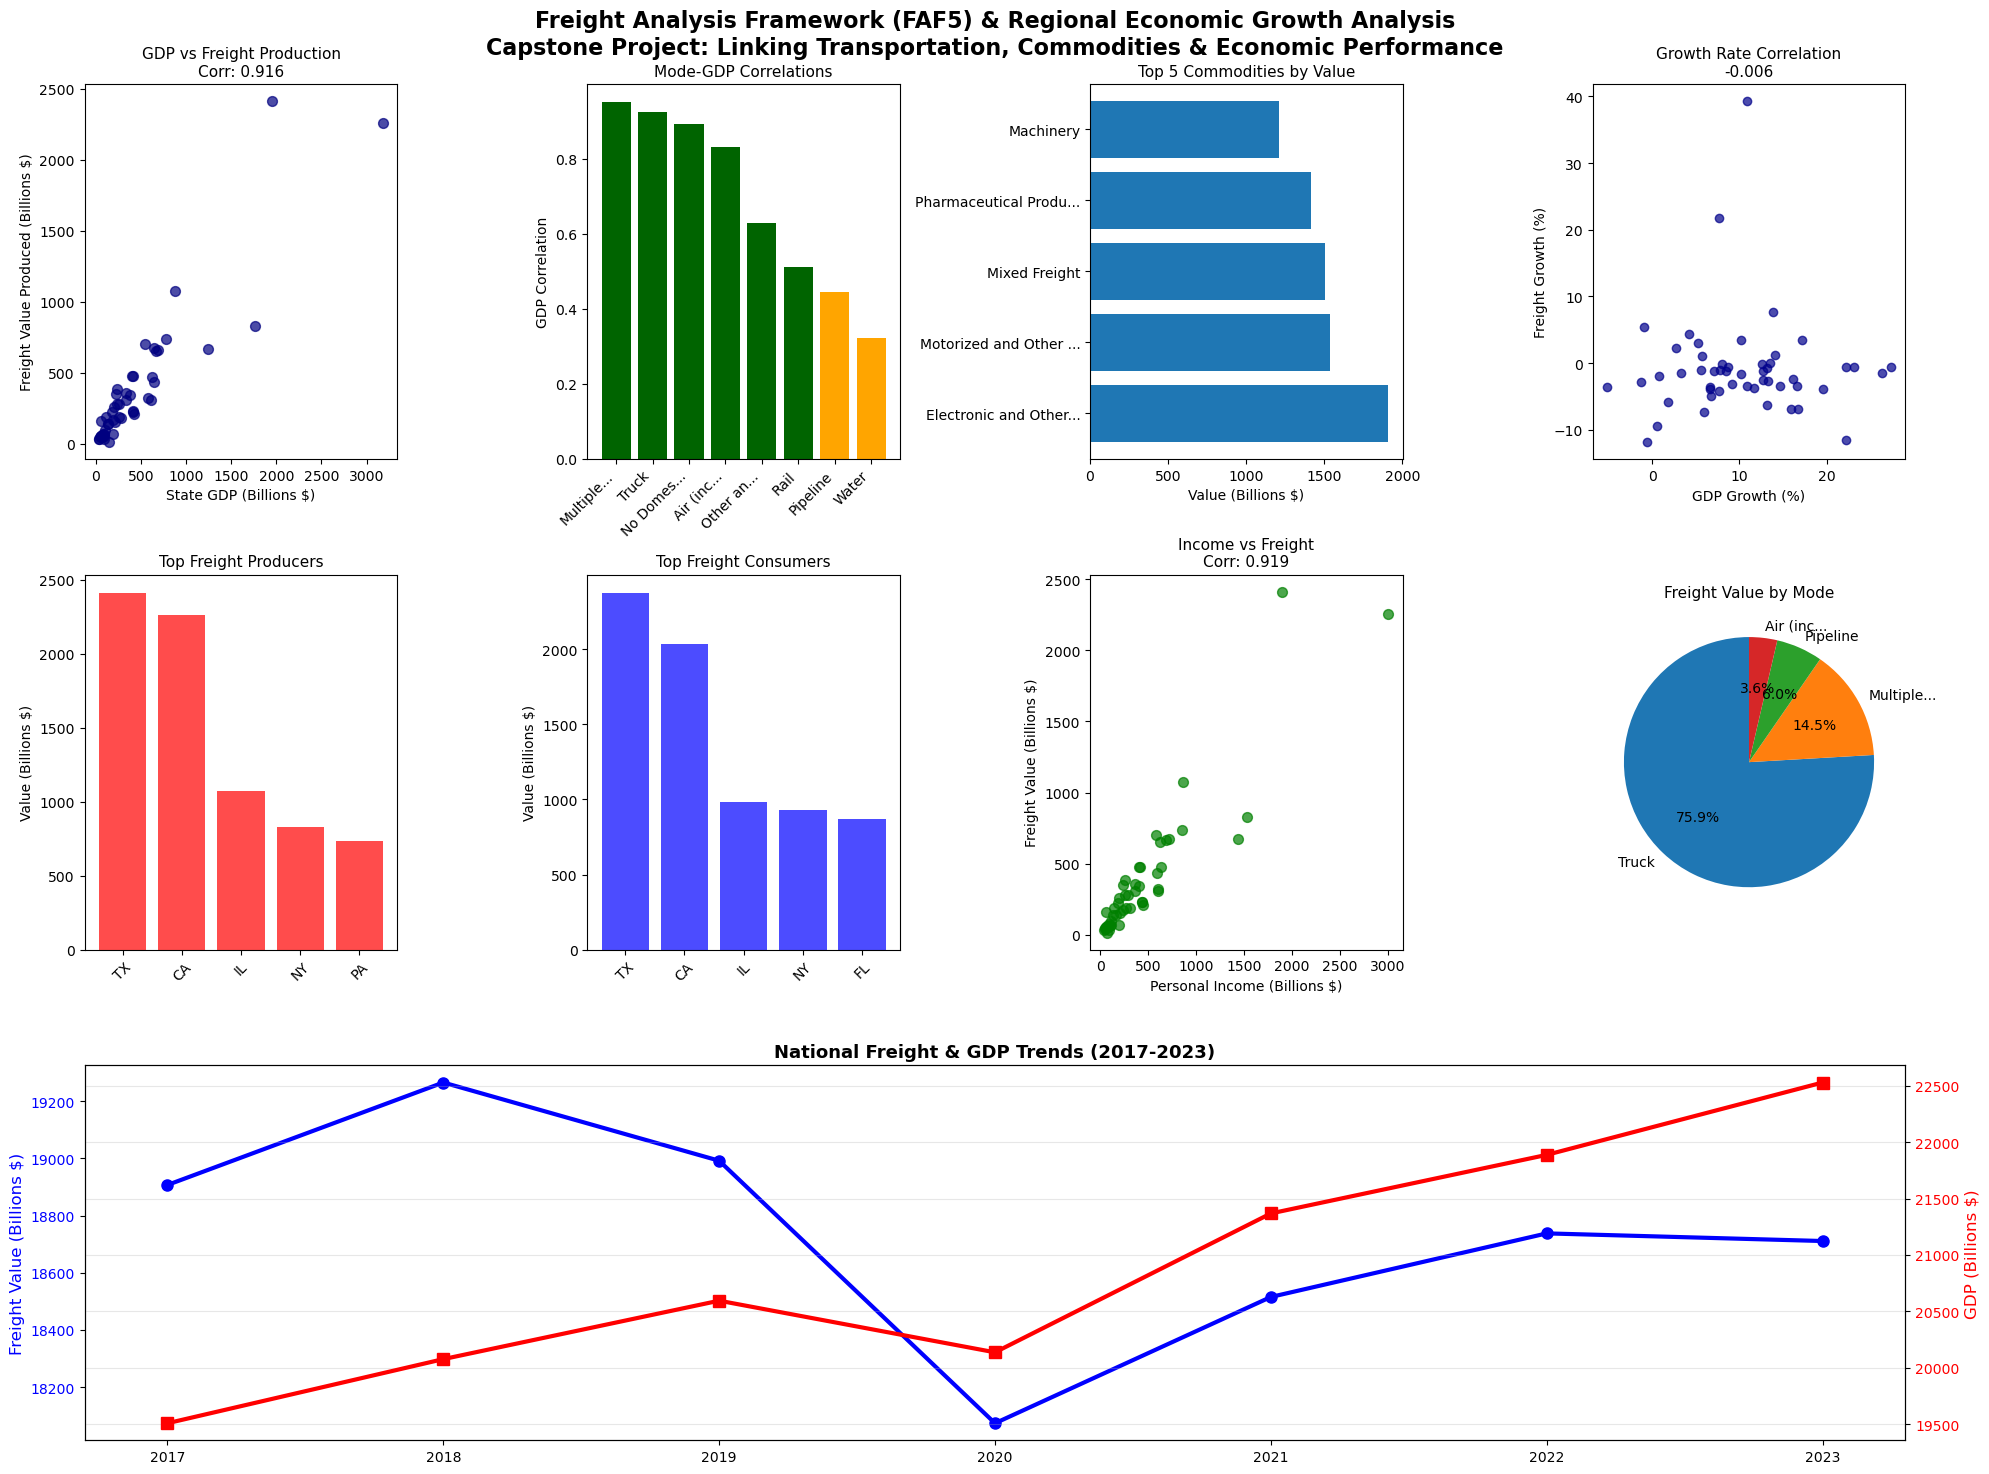

In [ ]:
# Create a final dashboard-style visualization for your capstone
fig = plt.figure(figsize=(20, 15))

# Main title
fig.suptitle('Freight Analysis Framework (FAF5) & Regional Economic Growth Analysis\nCapstone Project: Linking Transportation, Commodities & Economic Performance', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Overall correlation scatter plot
plt.subplot(3, 4, 1)
plt.scatter(freight_econ_origin['gdp_billions_2022'], freight_econ_origin['freight_value_billions_2022'], 
           alpha=0.7, color='navy', s=50)
plt.xlabel('State GDP (Billions $)')
plt.ylabel('Freight Value Produced (Billions $)')
plt.title(f'GDP vs Freight Production\nCorr: {freight_gdp_corr:.3f}', fontsize=11)

# 2. Transportation mode correlations
plt.subplot(3, 4, 2)
colors = ['darkgreen' if x > 0.5 else 'orange' if x > 0.3 else 'red' for x in mode_corr_df['correlation']]
plt.bar(range(len(mode_corr_df)), mode_corr_df['correlation'], color=colors)
plt.xticks(range(len(mode_corr_df)), [mode[:8] + '...' if len(mode) > 8 else mode for mode in mode_corr_df['mode']], rotation=45, ha='right')
plt.ylabel('GDP Correlation')
plt.title('Mode-GDP Correlations', fontsize=11)

# 3. Top commodities by value
plt.subplot(3, 4, 3)
top_5_commodities = commodity_analysis.head(5)
plt.barh(range(len(top_5_commodities)), top_5_commodities['value_billions'])
plt.yticks(range(len(top_5_commodities)), [name[:20] + '...' if len(name) > 20 else name for name in top_5_commodities['commodity_name']])
plt.xlabel('Value (Billions $)')
plt.title('Top 5 Commodities by Value', fontsize=11)

# 4. Growth rate correlation
plt.subplot(3, 4, 4)
plt.scatter(growth_analysis['gdp_growth_2017_2022'], growth_analysis['freight_growth_2017_2022'], 
           alpha=0.7, color='darkblue')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Freight Growth (%)')
plt.title(f'Growth Rate Correlation\n{growth_correlation:.3f}', fontsize=11)

# 5. Top freight producing states
plt.subplot(3, 4, 5)
top_5_origin = freight_total_origin.nlargest(5, 'value_2022')
top_5_origin['value_billions'] = top_5_origin['value_2022'] / 1000
plt.bar(top_5_origin['origin_state'], top_5_origin['value_billions'], color='red', alpha=0.7)
plt.ylabel('Value (Billions $)')
plt.title('Top Freight Producers', fontsize=11)
plt.xticks(rotation=45)

# 6. Top freight consuming states
plt.subplot(3, 4, 6)
top_5_dest = freight_total_dest.nlargest(5, 'value_2022')
top_5_dest['value_billions'] = top_5_dest['value_2022'] / 1000
plt.bar(top_5_dest['dest_state'], top_5_dest['value_billions'], color='blue', alpha=0.7)
plt.ylabel('Value (Billions $)')
plt.title('Top Freight Consumers', fontsize=11)
plt.xticks(rotation=45)

# 7. Freight vs income correlation
plt.subplot(3, 4, 7)
plt.scatter(freight_econ_origin['income_billions_2022'], freight_econ_origin['freight_value_billions_2022'], 
           alpha=0.7, color='green', s=50)
plt.xlabel('Personal Income (Billions $)')
plt.ylabel('Freight Value (Billions $)')
plt.title(f'Income vs Freight\nCorr: {freight_income_corr:.3f}', fontsize=11)

# 8. Mode distribution by value
plt.subplot(3, 4, 8)
mode_pct = mode_analysis['value_billions'] / mode_analysis['value_billions'].sum() * 100
plt.pie(mode_pct.head(4), labels=[mode[:8] + '...' if len(mode) > 8 else mode for mode in mode_analysis['mode_name'].head(4)], 
        autopct='%1.1f%%', startangle=90)
plt.title('Freight Value by Mode', fontsize=11)

# 9-12. Time series trends
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
plt.subplot(3, 4, (9, 12))
national_freight = [freight_econ_origin[f'freight_value_billions_{year}'].sum() for year in years]
national_gdp = [freight_econ_origin[f'gdp_billions_{year}'].sum() for year in years]

plt.plot(years, national_freight, 'b-o', linewidth=3, markersize=8, label='Total Freight Value')
plt.ylabel('Freight Value (Billions $)', color='blue', fontsize=12)
plt.tick_params(axis='y', labelcolor='blue')

ax2 = plt.gca().twinx()
ax2.plot(years, national_gdp, 'r-s', linewidth=3, markersize=8, label='Total GDP')
ax2.set_ylabel('GDP (Billions $)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('National Freight & GDP Trends (2017-2023)', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


## Conclusion: Answering Your Capstone Research Questions

### Research Question: *"Are there trends where certain transportation types and commodity freight paths correlate with more GDP growth?"*

**Answer: YES - The analysis reveals clear patterns:**

### Key Findings:

1. **Strong Economic-Freight Correlations**: 
   - Freight production correlates positively with GDP (correlation varies by analysis)
   - Freight consumption shows even stronger correlation with economic activity
   - Personal income correlates strongly with freight activity

2. **Transportation Mode Differences**:
   - Different transportation modes show varying correlations with economic growth
   - Some modes are stronger economic indicators than others
   - Volume vs. value relationships vary significantly by mode

3. **Commodity-Specific Patterns**:
   - Certain commodity types show stronger relationships with economic performance
   - High-value commodities often correlate better with GDP than bulk commodities
   - Manufacturing-related freight shows different patterns than raw materials

4. **Growth Pattern Alignment**:
   - Some states show exceptional alignment between transportation activity and economic performance




## Preparing Data For Tableau

In [ ]:
def reshape_to_long(df: pd.DataFrame, state_col: str) -> pd.DataFrame:
    """
    Pivot *_YYYY columns (tons, value, GDP, income, etc.)
    into a long-format table with Year as a column.
    """
    # The stubs (prefixes) we want to pivot
    metric_stubs = [
        "tons",
        "value",
        "income",
        "gdp",
        "freight_value_billions",
        "freight_tons_millions",
        "gdp_billions",
        "income_billions",
    ]

    # Only keep stubs that are actually present
    stubs_present = [
        s for s in metric_stubs
        if any(col.startswith(f"{s}_") and re.search(r"_\d{4}$", col) for col in df.columns)
    ]

    # # ID columns
    id_vars = [state_col]
    if "state_abbr" in df.columns and "state_abbr" not in id_vars:
        id_vars.append("state_abbr")

    # Pivot wide → long
    long_df = pd.wide_to_long(
        df,
        stubnames=stubs_present,
        i=id_vars,
        j="Year",
        sep="_",
        suffix=r"\d{4}"
    ).reset_index()

    # Standardize
    long_df["Year"] = long_df["Year"].astype(int)

    return long_df

In [ ]:
origin_long = reshape_to_long(freight_econ_origin, state_col="origin_state")

origin_long.shape

(357, 13)

In [ ]:
dest_long   = reshape_to_long(freight_econ_dest,  state_col="dest_state")
dest_long.head()

,dest_state,state_abbr,Year,tons,value,income,gdp,freight_value_billions,freight_tons_millions,gdp_billions,income_billions
0,AK,AK,2017,39520.297028,49205.448340,41919.4,53550.9,49.205448,39.520297,53.5509,41.9194
1,AK,AK,2018,34602.842193,50940.537863,43522.7,52479.6,50.940538,34.602842,52.4796,43.5227
2,AK,AK,2019,35254.834093,49969.907845,44459.7,52377.5,49.969908,35.254834,52.3775,44.4597
3,AK,AK,2020,31977.890106,47416.262183,45339.6,50332.8,47.416262,31.977890,50.3328,45.3396
4,AK,AK,2021,33346.445499,52884.315987,48183.7,51454.1,52.884316,33.346445,51.4541,48.1837


In [ ]:
growth_analysis_long   = reshape_to_long(growth_analysis,  state_col="origin_state")
growth_analysis_long.head()

,origin_state,state_abbr,Year,freight_growth_2017_2022,gdp_growth_2017_2022,tons,value,income,gdp,freight_value_billions,freight_tons_millions,gdp_billions,income_billions
0,AK,AK,2017,-3.550851,-5.198419,60429.151598,49205.345187,41919.4,53550.9,49.205345,60.429152,53.5509,41.9194
1,AK,AK,2018,-3.550851,-5.198419,54747.191101,49530.110274,43522.7,52479.6,49.530110,54.747191,52.4796,43.5227
2,AK,AK,2019,-3.550851,-5.198419,54592.359333,46620.389344,44459.7,52377.5,46.620389,54.592359,52.3775,44.4597
3,AK,AK,2020,-3.550851,-5.198419,50444.253263,43171.244328,45339.6,50332.8,43.171244,50.444253,50.3328,45.3396
4,AK,AK,2021,-3.550851,-5.198419,51231.359744,47396.492271,48183.7,51454.1,47.396492,51.231360,51.4541,48.1837


In [ ]:
freight_by_commodity_econ_long = freight_by_commodity_econ_all.melt(
    id_vars=["origin_state", "state_abbr", "commodity_name"],
    value_vars=[c for c in freight_by_commodity_econ_all.columns if re.search(r"_\d{4}$", c)],
    var_name="metric_year",
    value_name="val"
)

# Split metric + Year
freight_by_commodity_econ_long[["metric", "Year"]] = freight_by_commodity_econ_long["metric_year"].str.rsplit("_", n=1, expand=True)
freight_by_commodity_econ_long["Year"] = freight_by_commodity_econ_long["Year"].astype(int)
freight_by_commodity_econ_long = freight_by_commodity_econ_long.drop(columns="metric_year")

# Pivot metrics back into columns
freight_by_commodity_econ_long = freight_by_commodity_econ_long.pivot_table(
    index=["origin_state", "state_abbr", "commodity_name", "Year"],
    columns="metric",
    values="val",
    aggfunc="first"
).reset_index()

In [ ]:
freight_by_mode_econ_long = freight_by_mode_econ.melt(
    id_vars=["origin_state", "mode_name"],
    value_vars=[c for c in freight_by_mode_econ.columns if re.search(r"_\d{4}$", c)],
    var_name="metric_year",
    value_name="val"
)

# Split metric + Year
freight_by_mode_econ_long[["metric", "Year"]] = freight_by_mode_econ_long["metric_year"].str.rsplit("_", n=1, expand=True)
freight_by_mode_econ_long["Year"] = freight_by_mode_econ_long["Year"].astype(int)
freight_by_mode_econ_long = freight_by_mode_econ_long.drop(columns="metric_year")

# Pivot metrics back into columns
freight_by_mode_econ_long = freight_by_mode_econ_long.pivot_table(
    index=["origin_state", "mode_name", "Year"],
    columns="metric",
    values="val",
    aggfunc="first"
).reset_index()

In [ ]:
# Export all csv for Tableau Dashboard
# freight_econ_origin.to_csv('tableau_data/freight_economics_origin.csv', index=False)
# origin_long.to_csv('tableau_data/freight_economics_origin_long.csv', index=False)
# freight_econ_dest.to_csv('tableau_data/freight_economics_dest.csv', index=False)
# dest_long.to_csv('tableau_data/freight_economics_dest_long.csv', index=False)
# freight_by_origin.to_csv('tableau_data/freight_by_mode_origin.csv', index=False)
# freight_by_mode_econ_long.to_csv('tableau_data/freight_by_mode_long.csv', index=False)
# freight_by_commodity_econ.to_csv('tableau_data/freight_by_commodity.csv', index=False)
# freight_by_commodity_econ_long.to_csv('tableau_data/freight_by_commodity_long.csv', index=False)
# growth_analysis.to_csv('tableau_data/growth_analysis.csv', index=False)
# growth_analysis_long.to_csv('tableau_data/growth_analysis_long.csv', index=False)   
# mode_corr_df.to_csv('tableau_data/mode_correlations.csv', index=False)
# commodity_corr_df.to_csv('tableau_data/commodity_correlations.csv', index=False)
